# Figure S11

Validation using data from Zhang et al., Nat Immunol 2024

In [1]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(anndata)
library(edgeR)
library(scales)
library(knitr)
library(viridis)
library(ComplexHeatmap)
library(circlize)
library(ggtern)
library(RColorBrewer)
library(corrplot)
library(Seurat)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

set.seed(42) 
Sys.time()
Sys.getenv("CONDA_DEFAULT_ENV")

Warning message:
“package ‘tidyverse’ was built under R version 4.3.3”
── Attaching core tidyverse packages ───────────────────────────────────────────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.4
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.3     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ─────────────────────────────────────────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors

Attaching package: ‘data.table’


The following objects are masked from ‘package:lubridate’:

    hour, isoweek, mday, minute, month, quarter, second, wday, week,
    yday, year


The following objects are masked from ‘package:dplyr’:

    between, first, last


The following object is masked from ‘package:purrr’:

    transpose

[1] "2025-10-25 10:11:06 EEST"

[1] "traj_inf"

In [2]:
colorcode <- c(
  "HSC-2"   = "#fbd1dc",  
  "MPP-1"   = "#ffb6ca",  
  "MPP-2"   = "#ff9bb9",  
  "MPP-MEP" = "#ff7ca6",   

"LMPP-1"         = "#FAD0F8",  
"LMPP-1-cycling" = "#EDB6F4", 

"Multilin-1" = "#DFD8F6",  
"Multilin-2" = "#CCC5ED", 

    
  "MEP-1" = "#f7ccc2",
  "MEP-2" = "#fbb9ab",
  "MEP-Eryth-1" = "#fea597",
  "MEP-Eryth-2" = "#ff9183",
  
  "ERP-1" = "#ff7b6f",
  "ERP-2" = "#fe615b",
  "ERP-3" = "#f7484a",
  "ERP-4" = "#e8383d",
  "ERP-5" = "#d62d32",
  "ERP-6" = "#c22128",
  "ERP-7" = "#ae131d",
  "ERP-8" = "#9D0717",
  
  "Erythroblast-1" = "#7d0616",
  "Erythroblast-2" = "#610412",
  "Erythroblast-3" = "#45000a",

  # MkP lineage
  "MKP-early" = "#C4A09A",  
  "MKP-late" = "#9D7E78",  

  # Lymphoid 
  "CLP" = "#DEF0F5",  
  "Pro-B-Early" = "#c8e9f0",  
  "Pro-B-1" = "#a7dde7",  
  "Pro-B-cycling-2" = "#80d0de",  
  "Pro-B-Early-cycling" = "#5cc7d6",  
  "Pro-B-cycling-1" = "#42bace",  
  "Transitional-B-1" = "#3bafc7",  
  "Pro-B-2" = "#318cb4",  
  "pre-B" = "#276C9B",  
  "B Memory-1" = "#1F4C83",  
  "B Memory-2" = "#173B69",  
  "Plasma Cell" = "#0C2048",  

  # T & NK 
  "CD4 TCM" = "#4D0038",  
  "T CD4 Naive-2" = "#6C2E44",  
  "T CD8 Naive" = "#8C5968",  
  "CD8 TEM" = "#522E48",  
  "MAIT" = "#6C7469",  
  "NK-Mature" = "#53424d",  

  # GMPs
  "MultiLin-GMP-2" = "#e5dbce",  
  "MultiLin-GMP-3" = "#D2BFAF",  
    
  "preNeu"    = "#d4cfc9",  
  "immNeu-1"  = "#b8b0a8",  

  # Myeloid lineage
  "cMOP" = "#F0D4BA",  
  "Mono-1" = "#E0B89F",  
  "Mono-2" = "#D29773",  
  "Intermediate Mono-1" = "#C5794C",  
  "Intermediate Mono-2" = "#B75926",  
  "Intermediate Mono-3" = "#983306",  
  "Classical-Mono" = "#761706",  
  "Non-Classical Mono-2" = "#590007",  
  "Myeloid intermediate 1" = "#F5ECD7",  
  "Myeloid intermediate 2" = "#FBE4CA",  
  "Myeloid intermediate 3" = "#F5DBBF",  

  # DCs
  "MDP-2"     = "#ffcec2",  
  "MDP-3"     = "#f3b9ad",
  "MDP-5"     = "#e5a499",
  "pre-DC-1"  = "#d78e83",
  "pre-DC-3"  = "#c7786c",
  "cDC1"      = "#b26358",
  "cDC2-1"    = "#97504d",
  "cDC2-2"    = "#7a3e3e",
  "pDC" = "#BC4F57",    
  "ASDC" = "#C46A71"

)

labelorder <- names(colorcode)

In [3]:
length(labelorder)

[1] 68

In [ ]:
ad <- read_h5ad ("/research/work/andreha/privat/Andrea/2025_Sylvain/data/pdata_Zhang2024_corrected.h5ad")

#ad$obs$cel_type =  as.factor(ad$obs$`Level 3M`)

In [7]:
ad$obs$cell_type =  as.factor(ad$obs$`cell_type`)

In [8]:
ad

AnnData object with n_obs × n_vars = 338 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 1', 'Level 2', 'Level 3 Multimodal', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [9]:
head(unique(ad$obs$cell_type))

[1] ASDC       B Memory-1 B Memory-2 BMCP-1     BMCP-2     CD4 TCM   
85 Levels: ASDC B Memory-1 B Memory-2 BMCP-1 BMCP-2 CD4 TCM CD8 TEM ... preNeu

In [10]:
ad <- ad[ad$obs$cell_type %in% labelorder, ]
ad

View of AnnData object with n_obs × n_vars = 272 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 1', 'Level 2', 'Level 3 Multimodal', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [11]:
#----------
MIN_CELLS = 10
MIN_READS =50000 #50.000 as in EdgeR notebook

keep.samples <-  ad$obs$psbulk_n_cells >= MIN_CELLS
table(keep.samples)

ad_filtr <- subset(ad, ad$obs$psbulk_n_cells >= MIN_CELLS)
keep.samples <-  ad_filtr$obs$psbulk_counts >= MIN_READS
table(keep.samples)

ad_filtr <- subset(ad_filtr, ad_filtr$obs$psbulk_counts >= MIN_READS)
ad_filtr

keep.samples
FALSE  TRUE 
    7   265 

keep.samples
TRUE 
 265 

View of AnnData object with n_obs × n_vars = 265 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 1', 'Level 2', 'Level 3 Multimodal', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [12]:
cell_type_counts <- ad_filtr$obs %>%
  group_by(cell_type) %>%
  summarise(donor_count = n_distinct(donor_id))

# cell types with fewer than X donors
low_donor_cell_types <- cell_type_counts %>%
  filter(donor_count < 1) %>%
  pull(cell_type)

ad_filtr <- subset(ad_filtr, !ad_filtr$obs$cell_type %in% low_donor_cell_types)
ad_filtr

View of AnnData object with n_obs × n_vars = 265 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 1', 'Level 2', 'Level 3 Multimodal', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [13]:
ad_filtr$obs$cell_type <- factor(ad_filtr$obs$cell_type) 
nlevels(ad_filtr$obs$cell_type)

[1] 68

In [14]:
x = t(ad_filtr$X)
head(x)

sampleinfo = ad_filtr$obs %>%
#select (., -c("sample")) %>%
rownames_to_column ("sample")

sampleinfo$cell_type <- droplevels(sampleinfo$cell_type)
head(sampleinfo, n=3)

BF21_ASDC BM27_ASDC WF26_ASDC WM34_ASDC BF21_B Memory-1
A1BG     83        111       57        216       14             
A1BG-AS1  6         11        5         12        1             
A1CF      0          0        0          0        0             
A2M       2          4        1          8        1             
A2M-AS1   1          1        2         10        0             
A2ML1     0          0        0          3        0             
         BM27_B Memory-1 WF26_B Memory-1 WM34_B Memory-1 BF21_B Memory-2
A1BG     11              3               5               1              
A1BG-AS1  0              1               2               0              
A1CF      0              0               0               0              
A2M       0              0               0               0              
A2M-AS1   0              0               0               0              
A2ML1     0              0               0               0              
         WM34_B Memory-2 ⋯ WF26_pre-DC-1 WM34_pre-DC-1 BF21_pre-DC-3
A1BG     12              ⋯ 254           244           68           
A1BG-AS1  0              ⋯  21            30            5           
A1CF      0              ⋯   0             0            0           
A2M       1              ⋯   5             5            3           
A2M-AS1   0              ⋯  10             4            3           
A2ML1     0              ⋯   0             1            0           
         BM27_pre-DC-3 WF26_pre-DC-3 WM34_pre-DC-3 BF21_preNeu BM27_preNeu
A1BG     164           44            205           229         468        
A1BG-AS1  10            1             27             8          23        
A1CF       0            0              0             0           0        
A2M        4            1              5             3          15        
A2M-AS1    3            1              6             7          31        
A2ML1      0            0              1             0           0        
         WF26_preNeu WM34_preNeu
A1BG     339         588        
A1BG-AS1  29          40        
A1CF       0           0        
A2M        8          11        
A2M-AS1   45          33        
A2ML1      1           3

sample    donor_id cell_type ancestry sex    age    Level 1   Level 2
1 BF21_ASDC BF21     ASDC      African  Female 21 yrs Dendritic ASDC   
2 BM27_ASDC BM27     ASDC      African  Male   27 yrs Dendritic ASDC   
3 WF26_ASDC WF26     ASDC      European Female 26 yrs Dendritic ASDC   
  Level 3 Multimodal Donor psbulk_n_cells psbulk_counts
1 ASDC               BF21  152            2148775      
2 ASDC               BM27  132            3315025      
3 ASDC               WF26  106            1618018

In [15]:
table(colnames(x)==sampleinfo$sample)

y <- DGEList (counts =x, 
              group = sampleinfo$cell_type, 
              genes = rownames (x))

keep <- filterByExpr(y) 
table(keep)



TRUE 
 265 

keep
FALSE  TRUE 
12257 21095 

In [16]:
y <- calcNormFactors(y, method = "TMM") #default in TMM
head(y$samples)

min (y$samples$norm.factors)
max (y$samples$norm.factors)

cpm <- cpm(y, normalized.lib.sizes=TRUE)
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
head (logcpm, n=2)

group      lib.size norm.factors
BF21_ASDC       ASDC       2148775  0.9682981   
BM27_ASDC       ASDC       3315025  0.9342016   
WF26_ASDC       ASDC       1618018  1.0068959   
WM34_ASDC       ASDC       6336434  0.8917527   
BF21_B Memory-1 B Memory-1  463991  1.2919642   
BM27_B Memory-1 B Memory-1  579662  1.1554914

[1] 0.3938633

[1] 1.436402

BF21_ASDC BM27_ASDC WF26_ASDC WM34_ASDC BF21_B Memory-1
A1BG     5.330434  5.177420  5.142914  5.269472  4.566791       
A1BG-AS1 1.691072  1.962436  1.771588  1.303899  1.009654       
         BM27_B Memory-1 WF26_B Memory-1 WM34_B Memory-1 BF21_B Memory-2
A1BG      4.067656       4.213404        3.204847         2.584181      
A1BG-AS1 -1.534245       2.681168        1.961757        -1.534245      
         WM34_B Memory-2 ⋯ WF26_pre-DC-1 WM34_pre-DC-1 BF21_pre-DC-3
A1BG      5.132430       ⋯ 4.652025      4.726986      4.667161     
A1BG-AS1 -1.534245       ⋯ 1.260255      1.831430      1.129642     
         BM27_pre-DC-3 WF26_pre-DC-3 WM34_pre-DC-3 BF21_preNeu BM27_preNeu
A1BG     4.7691454      4.653926     4.868247      4.8818219   4.7618867  
A1BG-AS1 0.9905194     -0.136736     2.051920      0.4469759   0.7326325  
         WF26_preNeu WM34_preNeu
A1BG     4.61706     5.080177   
A1BG-AS1 1.27203     1.391244

## calculate Pd

In [17]:
post_g1s = read.table ("/research/work/andreha/privat/Andrea/2024_Sylvain/data/postG1S_updated.csv", header = TRUE, sep = ",")
post_g1s = post_g1s$genes
post_g1s

x_pink <- x[post_g1s, ] # subset raw counts by SG2M genes ("post G1S")

x_pink_normalized <- t(apply(x_pink, 1, function(gene_counts) {
  gene_counts / sampleinfo$psbulk_n_cells 
}))

# z-score
x_pink_zscore <- t(apply(x_pink_normalized, 1, function(gene_counts) {
  (gene_counts - mean(gene_counts, na.rm = TRUE)) / sd(gene_counts, na.rm = TRUE)
}))

#  avg z-score
sample_avg_zscore <- colMeans(x_pink_zscore, na.rm = TRUE)

score_df <- data.frame(sample = names(sample_avg_zscore), avg_zscore = sample_avg_zscore)

# add sampleinfo
combined_df <- merge(score_df, sampleinfo, by = "sample")

# Min-max scale the avg z-scores
combined_df$prop2div <- (combined_df$avg_zscore - min(combined_df$avg_zscore)) /
                         (max(combined_df$avg_zscore) - min(combined_df$avg_zscore))

combined_df$cell_type <- factor(combined_df$cell_type, levels = names(colorcode))


[1] "AURKB"   "BIRC5"   "CCNA2"   "CDC20"   "CENPA"   "CENPI"   "CKAP5"  
 [8] "DDX21"   "ECT2"    "ESPL1"   "KIF11"   "KIF23"   "NCAPD2"  "NDC80"  
[15] "PLK1"    "POLR2B"  "RACGAP1" "RANGAP1" "RBBP6"   "RBMX"    "SF1"    
[22] "SFPQ"    "SMC4"    "SON"     "TOP2A"   "TPX2"    "WDR43"   "ZMAT2"  
[29] "KNL1"

In [18]:
combined_df_orig = combined_df

Warning message:
“package ‘classInt’ was built under R version 4.3.3”
Coordinate system already present. Adding new coordinate system, which will
replace the existing one.


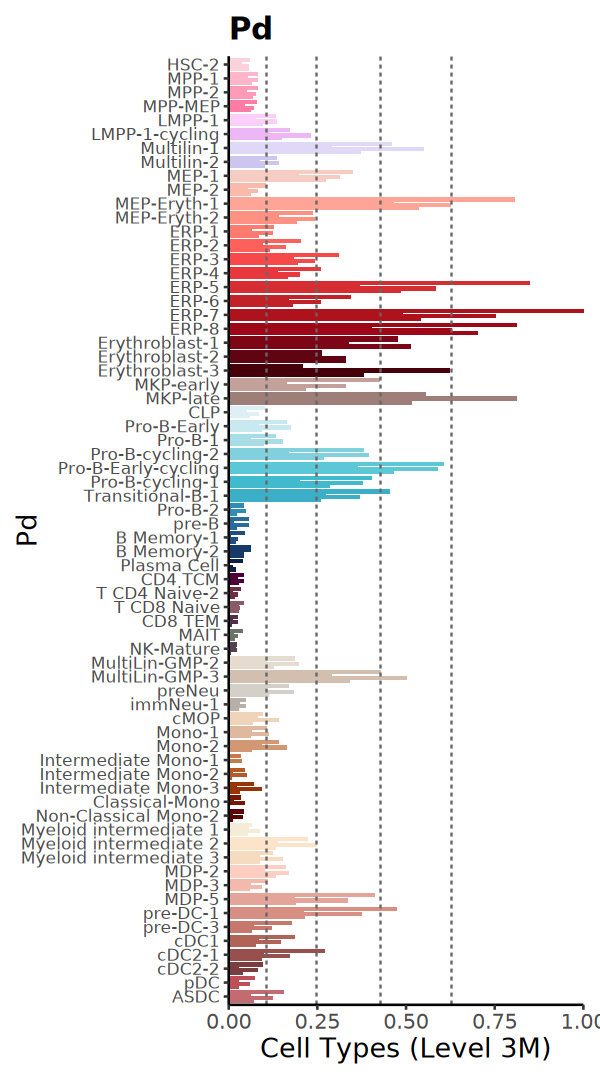

In [19]:
library(classInt)

#------------------------
jenks_breaks <- classInt::classIntervals(combined_df$prop2div, n = 5, 
                                         style = "jenks")

combined_df$jenks_group <- cut(combined_df$prop2div,
                                  breaks = jenks_breaks$brks,
                                  include.lowest = TRUE,
                                  labels = paste0("Group ", 1:5))
combined_df$`cell_type` <- factor(combined_df$`cell_type`, levels = rev(labelorder))
jenks_y_breaks <- sort(jenks_breaks$brks)
#------------------------

barplot <- ggplot(combined_df, 
                  aes(x = cell_type, 
                      y = prop2div, 
                      fill = `cell_type`, 
                      group = `donor_id`)) +
  geom_bar(stat = "identity", 
           position = position_dodge(width = 0.8), 
           show.legend = FALSE) +
  scale_fill_manual(values = colorcode) +
  # Jenks separators
  geom_hline(yintercept = jenks_y_breaks[-c(1, length(jenks_y_breaks))], 
             linetype = "dashed", color = "gray40", linewidth = 0.5) +
  scale_y_continuous(expand = c(0, 0)) +
  coord_cartesian(ylim = c(0, max(combined_df$prop2div, na.rm = TRUE))) +
  coord_flip() +
  theme_classic() +
  theme(
    axis.text.y = element_text(size = 10),
    axis.text.x = element_text(size = 12),
    axis.title.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold"),
    plot.margin = margin(10, 10, 10, 10)
  ) +
  labs(x = "Pd", y = "Cell Types (Level 3M)", title = "Pd")

fig (5,9)
barplot

In [20]:
ggsave("./data/NewSupFig1.pdf", barplot, 
       width = 5.5, height = 9)


In [21]:
max(combined_df$prop2div)

[1] 1

## test Level 1

In [18]:
jenks_breaks

style: jenks
        [0,0.107171] (0.107171,0.2468373] (0.2468373,0.427778] 
                 137                   66                   34 
 (0.427778,0.629165]         (0.629165,1] 
                  21                    7 

In [19]:
colnames(combined_df)


[1] "sample"             "avg_zscore"         "donor_id"          
 [4] "cell_type"          "ancestry"           "sex"               
 [7] "age"                "Level 1"            "Level 2"           
[10] "Level 3 Multimodal" "Donor"              "psbulk_n_cells"    
[13] "psbulk_counts"      "prop2div"           "jenks_group"

In [20]:
combined_df$cell_type <- as.character(combined_df$cell_type)

combined_df$cell_type <- factor(combined_df$cell_type, levels = labelorder)

combined_df <- combined_df[order(combined_df$cell_type), ]

In [21]:
head(combined_df)

sample     avg_zscore donor_id cell_type ancestry sex    age    Level 1
23  BF21_HSC-2 -0.5748154 BF21     HSC-2     African  Female 21 yrs HSPC   
88  BM27_HSC-2 -0.5644559 BM27     HSC-2     African  Male   27 yrs HSPC   
154 WF26_HSC-2 -0.6568756 WF26     HSC-2     European Female 26 yrs HSPC   
220 WM34_HSC-2 -0.5560748 WM34     HSC-2     European Male   34 yrs HSPC   
42  BF21_MPP-1 -0.5279834 BF21     MPP-1     African  Female 21 yrs HSPC   
107 BM27_MPP-1 -0.4484299 BM27     MPP-1     African  Male   27 yrs HSPC   
    Level 2 Level 3 Multimodal Donor psbulk_n_cells psbulk_counts prop2div  
23  HSC     HSC-2              BF21  573             8863598      0.05454470
88  HSC     HSC-2              BM27  338             7278137      0.05670992
154 HSC     HSC-2              WF26  435             5434937      0.03739355
220 HSC     HSC-2              WM34   77             1732264      0.05846162
42  MPP     MPP-1              BF21  249             4291743      0.06433291
107 MPP     MPP-1              BM27  812            21067126      0.08096016
    jenks_group
23  Group 1    
88  Group 1    
154 Group 1    
220 Group 1    
42  Group 1    
107 Group 1

In [22]:
#write.table (combined_df, "./data/sampleinfo_with_Pd.tsv",
#             sep = "\t")

In [24]:
library(dplyr)

summary_stats <- combined_df %>%
  group_by(cell_type) %>%
  summarise(
    mean_prop2div = mean(prop2div, na.rm = TRUE),
    median_prop2div = median(prop2div, na.rm = TRUE)
  )

combined_df <- combined_df %>%
  left_join(summary_stats, by = "cell_type")


In [25]:
head(summary_stats)

cell_type mean_prop2div median_prop2div
1 ASDC      0.10311362    0.09732323     
2 pDC       0.04670254    0.04289244     
3 cDC2-2    0.06115731    0.06022991     
4 cDC2-1    0.15811689    0.13589237     
5 cDC1      0.12286034    0.11509321     
6 pre-DC-3  0.10818079    0.09544021

In [26]:
max(summary_stats$mean_prop2div)

[1] 0.6957992

In [25]:
#write.table (summary_stats, "./data/Table_Pd_mean_median_Zhang4donors.tsv", 
#             sep = "\t")

In [26]:
jenks_result <- classIntervals(combined_df$prop2div, 
                               n = 5, style = "jenks")

jenks_result$brks

[1] 0.0000000 0.1071710 0.2468373 0.4277780 0.6291650 1.0000000

In [34]:
G1Sgenes = c("CCND1","CCND2","CCND3","CCNE1","CCNE2", #cyclins
           "RB1","RBL1","RBL2", #RB related proteins
           "CDK2","CDK4","CDK6",
           "E2F1","E2F2","E2F3",
            "CDC25A","CDKN1A","CDKN1B","CDKN1C","CDKN2A","CDKN2B","CDKN2C","CDKN2D","CDKN3", "MYC")

#cpm <- cpm(y, normalized.lib.sizes=TRUE)

logcpm_CC = logcpm[G1Sgenes,]
logcpm_CC_t = t(logcpm_CC)

logCPM_sc <- t(scale(t(logcpm_CC)))

#-------
correlaciones <- cor(logcpm_CC_t,
                      method = "pearson"#,
                    #use = "pairwise.complete.obs"
                    )

hc <- hclust(as.dist(1 - correlaciones))

hc


Call:
hclust(d = as.dist(1 - correlaciones))

Cluster method   : complete 
Number of objects: 24 


In [35]:
head(correlaciones)

CCND1        CCND2        CCND3        CCNE1        CCNE2       
CCND1  1.000000000  0.194514866 -0.076923050  0.080221327  0.002476455
CCND2  0.194514866  1.000000000 -0.448644590 -0.065002502 -0.003232047
CCND3 -0.076923050 -0.448644590  1.000000000 -0.001123774  0.164405407
CCNE1  0.080221327 -0.065002502 -0.001123774  1.000000000  0.610655140
CCNE2  0.002476455 -0.003232047  0.164405407  0.610655140  1.000000000
RB1   -0.239805922 -0.660507455  0.404633433  0.010910720  0.034620844
      RB1         RBL1        RBL2        CDK2        CDK4       ⋯ CDC25A     
CCND1 -0.23980592 -0.02418673  0.01742363  0.11128233  0.1210287 ⋯ -0.01780821
CCND2 -0.66050746 -0.05833584 -0.22800078  0.20530671  0.4420336 ⋯  0.06868678
CCND3  0.40463343  0.22497105  0.39855520 -0.23590014 -0.4095564 ⋯ -0.05911341
CCNE1  0.01091072  0.59194092 -0.38544490  0.71622851  0.6035794 ⋯  0.69102360
CCNE2  0.03462084  0.74732664 -0.50132418  0.61326674  0.4537025 ⋯  0.79632692
RB1    1.00000000  0.01143169  0.07387270 -0.07707435 -0.2486685 ⋯  0.07037538
      CDKN1A      CDKN1B      CDKN1C      CDKN2A      CDKN2B      CDKN2C      
CCND1 -0.15938897 -0.06804665 -0.06856244  0.01291536 -0.01524023  0.088764497
CCND2 -0.36361928 -0.13354694 -0.08440442 -0.30900685 -0.25525662 -0.053032863
CCND3  0.25250670  0.30848314 -0.07936381  0.35691722  0.08458231 -0.004686084
CCNE1 -0.15916281 -0.27999231 -0.23558480 -0.16593556 -0.18972017  0.615266859
CCNE2 -0.05862604 -0.24215530 -0.30067881  0.01964476 -0.17798055  0.540110786
RB1    0.33316162  0.09250129 -0.03956869  0.31728079  0.25414248  0.028156602
      CDKN2D        CDKN3       MYC        
CCND1 -0.0687788136  0.09479241  0.36091893
CCND2 -0.4941166302  0.01356856  0.29202996
CCND3  0.3870182448 -0.12192130 -0.17286890
CCNE1 -0.1607011217  0.67517266  0.17622138
CCNE2 -0.0002028288  0.69632354 -0.04491309
RB1    0.3544065108  0.03964617 -0.19455386

In [36]:
gene_order <- c(
  "MYC",
  "CCND2",
  "CDK6",
  "E2F3",
  "CCND1",
  "CDK4",
  "E2F2",
  "RBL1",
  "CDC25A",
  "CCNE1",
  "CDKN2C",
  "CDK2",
  "CDKN3",
  "CCNE2",
  "E2F1",
  "CDKN2D",
  "CDKN1A",
  "RB1",
  "CDKN2B",
  "CDKN1C",
  "CDKN2A",
  "CCND3",
  "CDKN1B",
  "RBL2"
)

In [37]:
genes_in_order <- gene_order[gene_order %in% rownames(correlaciones)]

# reorder the correlation matrix
correlaciones_reordered <- correlaciones[genes_in_order, genes_in_order]
correlaciones_reordered

MYC          CCND2        CDK6        E2F3        CCND1       
MYC     1.000000000  0.292029960  0.01472237 -0.11743305  0.360918932
CCND2   0.292029960  1.000000000  0.41187907  0.35187892  0.194514866
CDK6    0.014722370  0.411879069  1.00000000  0.68595198 -0.015922375
E2F3   -0.117433048  0.351878923  0.68595198  1.00000000 -0.182925312
CCND1   0.360918932  0.194514866 -0.01592238 -0.18292531  1.000000000
CDK4    0.183236579  0.442033624  0.74695753  0.69537077  0.121028664
E2F2   -0.131965160 -0.304630769  0.16903508  0.28529818 -0.114829325
RBL1    0.011901431 -0.058335838  0.24572869  0.14889490 -0.024186725
CDC25A  0.054876046  0.068686784  0.43950999  0.50079361 -0.017808208
CCNE1   0.176221383 -0.065002502  0.17756479  0.23410091  0.080221327
CDKN2C -0.015818016 -0.053032863  0.07634965  0.15789977  0.088764497
CDK2    0.187193383  0.205306713  0.58224766  0.56605534  0.111282329
CDKN3   0.054603506  0.013568560  0.40203788  0.45870242  0.094792406
CCNE2  -0.044913092 -0.003232047  0.25988257  0.26338215  0.002476455
E2F1   -0.009235559  0.045345564  0.52506828  0.51772324 -0.053281461
CDKN2D -0.429369951 -0.494116630 -0.49292994 -0.30910548 -0.068778814
CDKN1A -0.374743068 -0.363619280 -0.50126617 -0.18910783 -0.159388971
RB1    -0.194553861 -0.660507455 -0.11766102 -0.05184837 -0.239805922
CDKN2B -0.066533557 -0.255256623 -0.34776297 -0.17716106 -0.015240235
CDKN1C -0.355495348 -0.084404416 -0.17979264  0.03982606 -0.068562442
CDKN2A -0.054054118 -0.309006851 -0.29240310 -0.25296965  0.012915362
CCND3  -0.172868896 -0.448644590 -0.44088802 -0.37514314 -0.076923050
CDKN1B  0.155011383 -0.133546942 -0.62438551 -0.56099165 -0.068046646
RBL2    0.045850640 -0.228000782 -0.47191027 -0.61553955  0.017423627
       CDK4       E2F2        RBL1        CDC25A      CCNE1        ⋯
MYC     0.1832366 -0.13196516  0.01190143  0.05487605  0.176221383 ⋯
CCND2   0.4420336 -0.30463077 -0.05833584  0.06868678 -0.065002502 ⋯
CDK6    0.7469575  0.16903508  0.24572869  0.43950999  0.177564788 ⋯
E2F3    0.6953708  0.28529818  0.14889490  0.50079361  0.234100908 ⋯
CCND1   0.1210287 -0.11482933 -0.02418673 -0.01780821  0.080221327 ⋯
CDK4    1.0000000  0.26966349  0.35355784  0.63203222  0.603579411 ⋯
E2F2    0.2696635  1.00000000  0.64571417  0.77666578  0.556980836 ⋯
RBL1    0.3535578  0.64571417  1.00000000  0.74721359  0.591940916 ⋯
CDC25A  0.6320322  0.77666578  0.74721359  1.00000000  0.691023601 ⋯
CCNE1   0.6035794  0.55698084  0.59194092  0.69102360  1.000000000 ⋯
CDKN2C  0.2881741  0.61304482  0.48193793  0.56568918  0.615266859 ⋯
CDK2    0.8085411  0.57905850  0.58099194  0.78251652  0.716228512 ⋯
CDKN3   0.6452527  0.69127885  0.66837974  0.83572997  0.675172665 ⋯
CCNE2   0.4537025  0.68911372  0.74732664  0.79632692  0.610655140 ⋯
E2F1    0.6017740  0.75319327  0.67492030  0.81733682  0.579777190 ⋯
CDKN2D -0.5617351  0.28546233  0.08354521 -0.08949467 -0.160701122 ⋯
CDKN1A -0.4770568  0.19094612 -0.11321025 -0.12283778 -0.159162813 ⋯
RB1    -0.2486685  0.39267952  0.01143169  0.07037538  0.010910720 ⋯
CDKN2B -0.4065552  0.09552618 -0.18098141 -0.20704766 -0.189720171 ⋯
CDKN1C -0.2124488 -0.16721881 -0.46866794 -0.36174037 -0.235584800 ⋯
CDKN2A -0.4403372  0.30452812  0.02754839 -0.02805801 -0.165935559 ⋯
CCND3  -0.4095564  0.19954848  0.22497105 -0.05911341 -0.001123774 ⋯
CDKN1B -0.6523964 -0.13663620 -0.27486821 -0.43366352 -0.279992312 ⋯
RBL2   -0.6077353 -0.51733885 -0.24286368 -0.67197978 -0.385444900 ⋯
       E2F1         CDKN2D        CDKN1A       RB1         CDKN2B     
MYC    -0.009235559 -0.4293699513 -0.374743068 -0.19455386 -0.06653356
CCND2   0.045345564 -0.4941166302 -0.363619280 -0.66050746 -0.25525662
CDK6    0.525068280 -0.4929299394 -0.501266173 -0.11766102 -0.34776297
E2F3    0.517723240 -0.3091054779 -0.189107833 -0.05184837 -0.17716106
CCND1  -0.053281461 -0.0687788136 -0.159388971 -0.23980592 -0.01524023
CDK4    0.601774010 -0.5617351362 -0.477056756 -0.24866848 -0.40655522
E2F2    0.753193266  0.2854623312  

In [38]:
write.csv(
  correlaciones_reordered,
  file = "./data/revision_correlaciones_Zhang_68types.csv",
  row.names = TRUE,
  quote = FALSE
)


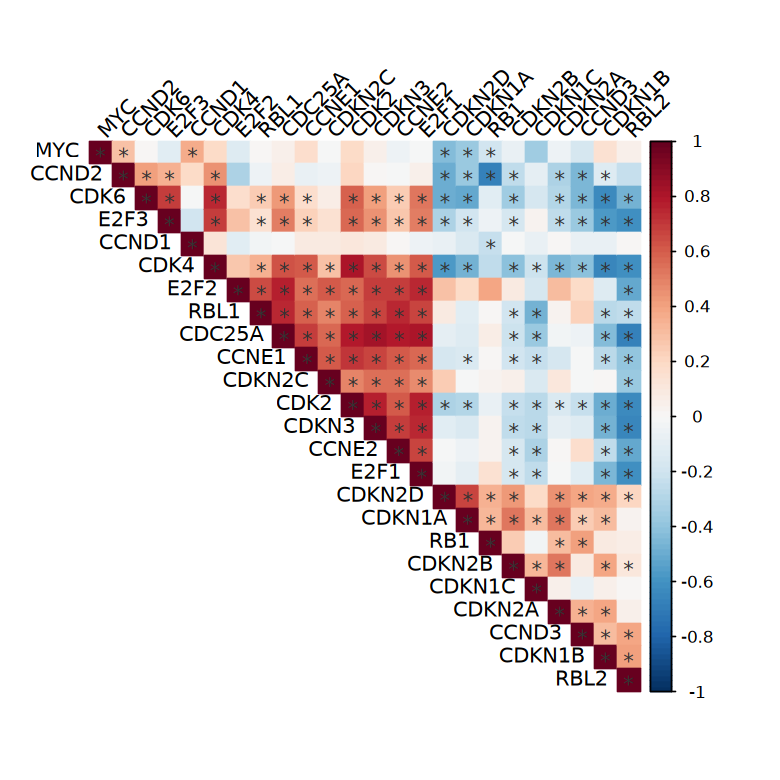

In [31]:
gene_order <- c(
  "MYC",
  "CCND2",
  "CDK6",
  "E2F3",
  "CCND1",
  "CDK4",
  "E2F2",
  "RBL1",
  "CDC25A",
  "CCNE1",
  "CDKN2C",
  "CDK2",
  "CDKN3",
  "CCNE2",
  "E2F1",
  "CDKN2D",
  "CDKN1A",
  "RB1",
  "CDKN2B",
  "CDKN1C",
  "CDKN2A",
  "CCND3",
  "CDKN1B",
  "RBL2"
)

genes_in_order <- gene_order[gene_order %in% rownames(correlaciones)]

correlaciones_reordered <- correlaciones[genes_in_order, genes_in_order]

testRes = cor.mtest(correlaciones_reordered, conf.level = 0.99)

adjusted_pvalues <- p.adjust(testRes$p, method = "BH")

adjusted_pvalues_matrix <- matrix(adjusted_pvalues, nrow = nrow(correlaciones_reordered), ncol = ncol(correlaciones_reordered))

colnames(adjusted_pvalues_matrix) <- colnames(correlaciones_reordered)
rownames(adjusted_pvalues_matrix) <- rownames(correlaciones_reordered)

fig (6.5,6.5)
corrplot(correlaciones_reordered, 
         p.mat = adjusted_pvalues_matrix, 
         sig.level = c(0.01), pch.cex = 1,
         tl.col="black", tl.srt=45,
         method = 'color', diag = TRUE, 
         type = 'upper',
         insig = 'label_sig', pch.col = 'grey20', 
         col = colorRampPalette(rev(brewer.pal(n=11, name="RdBu")))(100))  # Smooth gradient


In [39]:
pdf("./data/Revision_Zhang_correlation_plot.pdf", width = 6, height = 6)

corrplot(correlaciones_reordered, 
         p.mat = adjusted_pvalues_matrix, 
         sig.level = 0.01, pch.cex = 1,
         tl.col = "black", tl.srt = 45,
         method = 'color', diag = TRUE, 
         type = 'upper',
         insig = 'label_sig', pch.col = 'grey20', 
         col = colorRampPalette(rev(brewer.pal(n = 11, name = "RdBu")))(100))

dev.off()


pdf 
  2

## Ternary plot

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


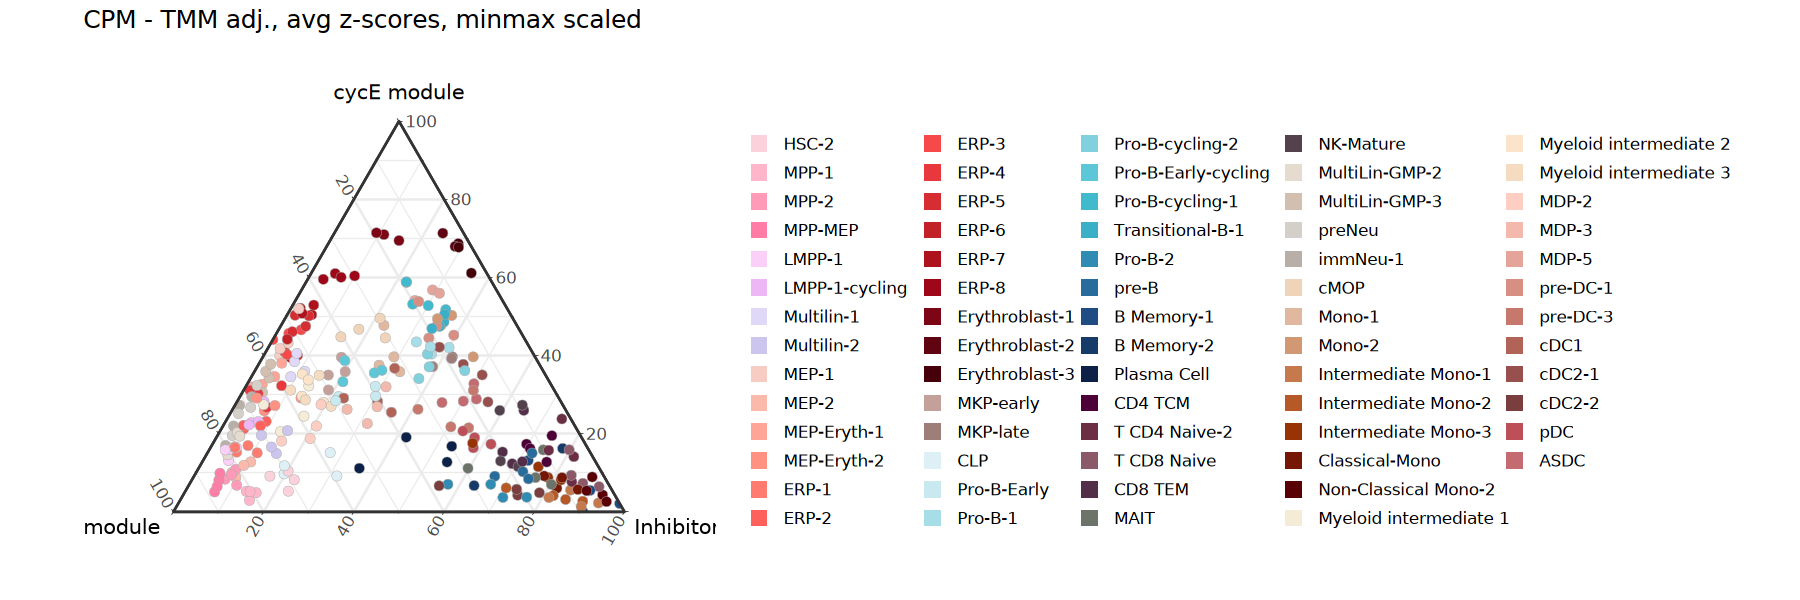

In [41]:
cycD_module <- c("CCND1", "CCND2", "CDK6", "MYC", "E2F3")

cycE_module <- c("CCNE1", "CCNE2", 
                 "CDK2", "CDK4", 
                 "CDC25A", "E2F1", "E2F2", 
                 "RBL1", "CDKN2C","CDKN3")

inhibitors_module <- c("RB1", "RBL2", 
                       "CDKN1B", "CDKN1C", "CDKN2A", "CDKN2B", "CDKN2D", "CCND3","CDKN1A")
#---------------------------------------

G1Sgenes = c("CCND1","CCND2","CCND3","CCNE1","CCNE2", #cyclins
           "RB1","RBL1","RBL2", #RB related proteins
           "CDK2","CDK4","CDK6",
           "E2F1","E2F2","E2F3",
            "CDC25A","CDKN1A","CDKN1B","CDKN1C","CDKN2A","CDKN2B","CDKN2C","CDKN2D","CDKN3", "MYC")

cpm <- cpm(y, normalized.lib.sizes=TRUE)

cpm_pink = cpm[G1Sgenes,]
cpm_pink_sc <- t(scale(t(cpm_pink)))
#head(cpm_pink)

#
logCPM_df <- as.data.frame(cpm_pink) %>%
  rownames_to_column(var = "gene") %>%  
  mutate(module = case_when(
    gene %in% cycE_module ~ "CycE",
    gene %in% cycD_module ~ "CycD",
    gene %in% inhibitors_module ~ "Inhibitors",
    TRUE ~ NA_character_  
  )) #%>%
 # filter(!is.na(module))

# the avg z-score per sample and module
module_avg_df <- logCPM_df %>%
  pivot_longer(cols = -c(gene, module), 
               names_to = "sample", 
               values_to = "z_score") %>%
  group_by(sample, module) %>%
  summarise(avg_z_score = mean(z_score, na.rm = TRUE), 
            .groups = "drop") %>%
  pivot_wider(names_from = module, values_from = avg_z_score)

module_avg_df_scaled <- module_avg_df %>%
  mutate(across(where(is.numeric), ~ (. - min(.)) / (max(.) - min(.))))

#---------
module_avg_df_minmax <- module_avg_df_scaled %>%
  mutate(
    total = CycD + CycE + Inhibitors,  
    CycD = CycD / total,               
    CycE = CycE / total,               
    Inhibitors = Inhibitors / total   
  ) %>%
  select(-total)  

#head(module_avg_df_minmax)
combined_df <- merge(module_avg_df_minmax, sampleinfo, by = "sample")
combined_df$color <- colorcode[combined_df$cell_type]
#head(combined_df,n=2)

combined_df$cell_type <- factor(combined_df$cell_type, 
                                levels = labelorder)


fig(15,5)
triangle = ggtern(data = combined_df, 
       aes(x = CycD, y = CycE, z = Inhibitors, color = cell_type, fill = cell_type)) +
  geom_point(shape = 21, size = 2.5, 
            color = "dark grey", stroke = 0.15) +  
  scale_fill_manual(values = colorcode) +  
  scale_color_manual(values = colorcode) +  
  labs(
    title = "CPM - TMM adj., avg z-scores, minmax scaled",
    x = "cycD module",
    y = "cycE module",
    z = "Inhibitors module"
  ) +
  theme_bw()+
  guides(
    fill = guide_legend(override.aes = list(size = 5, shape = 22, 
                                            stroke = 0), 
                        ncol = 5, title = "") )
triangle


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


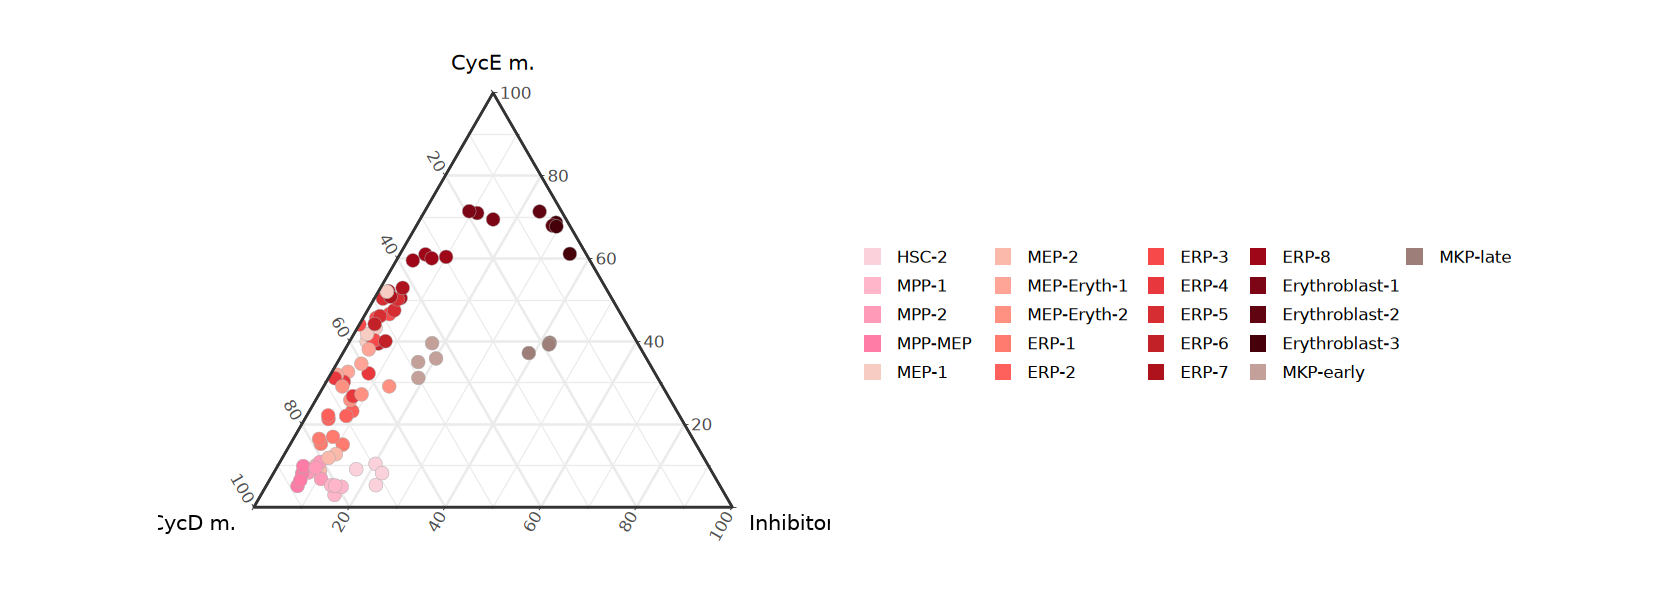

In [42]:
# filter for selected cell types
selected_cell_types <- c('HSC-2','MPP-1','MPP-2','MPP-MEP',
                         "MEP-1", "MEP-2", "MEP-Eryth-1", "MEP-Eryth-2", 
                         "ERP-1", "ERP-2", "ERP-3", "ERP-4", "ERP-5", 
                         "ERP-6", "ERP-7", "ERP-8", 
                         "Erythroblast-1", "Erythroblast-2", "Erythroblast-3",
"MKP-early", "MKP-late")

filtered_df <- combined_df %>%
  filter(cell_type %in% selected_cell_types)

filtered_df$cell_type <- factor(filtered_df$cell_type, levels = selected_cell_types)


triangle_plot_1 <- ggtern(data = filtered_df, 
       aes(x = CycD, y = CycE, z = Inhibitors, 
           color = cell_type, 
           fill = cell_type)) +
  geom_point(shape = 21, size = 3.5,  
            color = "dark grey", stroke = 0.15) +  
  scale_fill_manual(values = colorcode) +  
  scale_color_manual(values = colorcode) + 
  labs(
    x = "CycD m.",
    y = "CycE m.",
    z = "Inhibitors"
  ) +
  theme_bw()+
  guides(
    fill = guide_legend(override.aes = list(size = 5, shape = 22, 
                                            stroke = 0), 
                        ncol = 5, title = "") )

fig(14,5)
triangle_plot_1


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


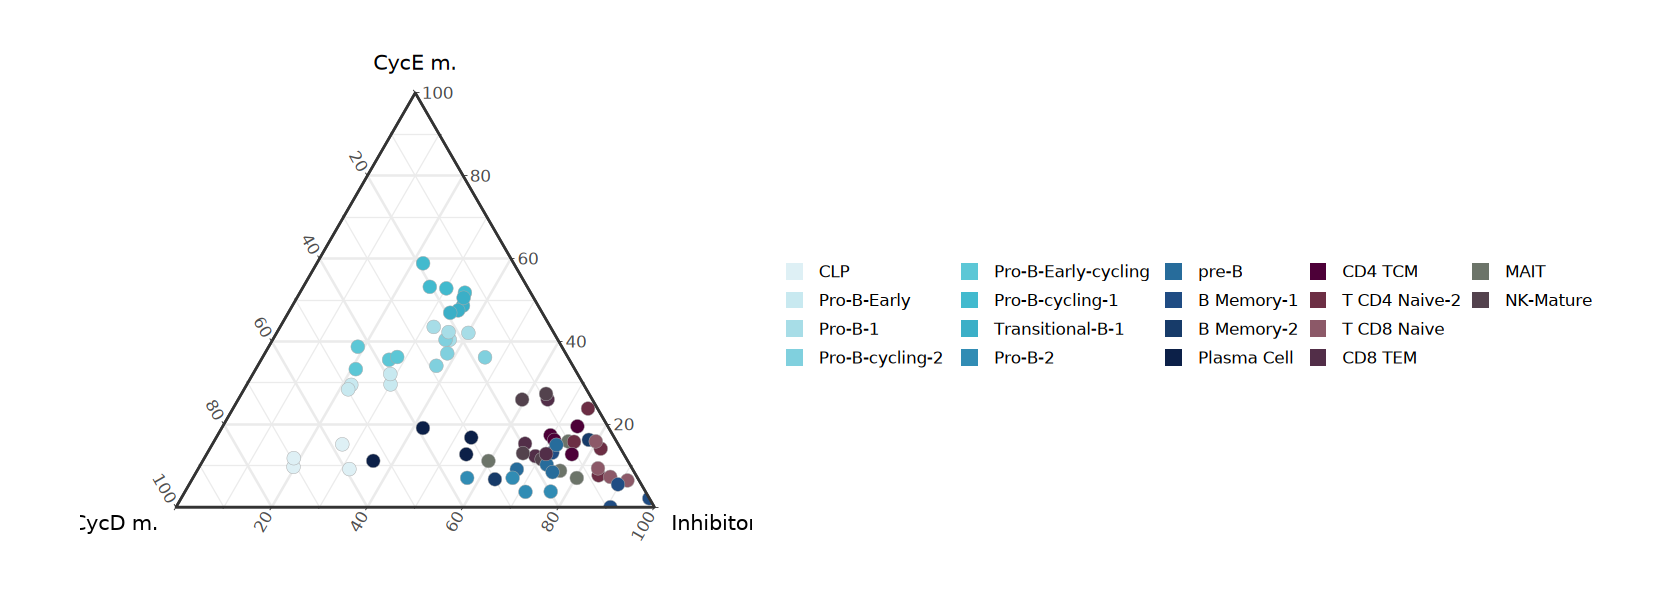

In [43]:
# filter for selected cell types
selected_cell_types <- c(
                        'CLP','Pro-B-Early','Pro-B-1','Pro-B-cycling-2','Pro-B-Early-cycling','Pro-B-cycling-1','Transitional-B-1','Pro-B-2','pre-B','B Memory-1','B Memory-2','Plasma Cell','CD4 TCM','T CD4 Naive-2','T CD8 Naive','CD8 TEM','MAIT','NK-Mature'
)

filtered_df <- combined_df %>%
  filter(cell_type %in% selected_cell_types)


triangle_plot_2 <- ggtern(data = filtered_df, 
       aes(x = CycD, y = CycE, z = Inhibitors, 
           color = cell_type, 
           fill = cell_type)) +
  geom_point(shape = 21, size = 3.5,  
            color = "dark grey", stroke = 0.15) +  
  scale_fill_manual(values = colorcode) +  
  scale_color_manual(values = colorcode) +  
  labs(
    x = "CycD m.",
    y = "CycE m.",
    z = "Inhibitors"
  ) +
  theme_bw()+
  guides(
    fill = guide_legend(override.aes = list(size = 5, shape = 22, 
                                            stroke = 0), 
                        ncol = 5, title = "") )

fig(14,5)
triangle_plot_2


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


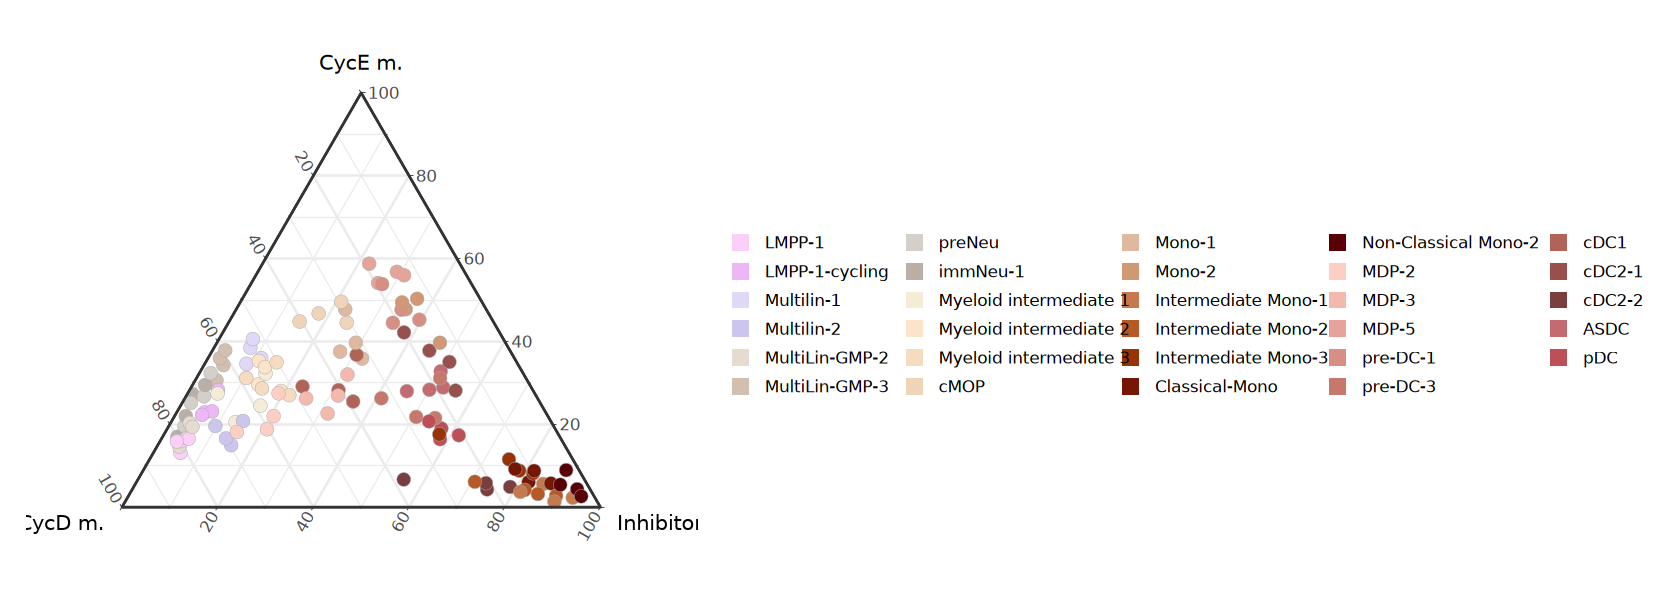

In [44]:
# filter for selected cell types
selected_cell_types <- c('LMPP-1','LMPP-1-cycling','Multilin-1','Multilin-2',
                        'MultiLin-GMP-2','MultiLin-GMP-3',
    'preNeu','immNeu-1','Myeloid intermediate 1','Myeloid intermediate 2','Myeloid intermediate 3','cMOP','Mono-1','Mono-2','Intermediate Mono-1','Intermediate Mono-2','Intermediate Mono-3','Classical-Mono','Non-Classical Mono-2','MDP-2','MDP-3','MDP-5','pre-DC-1','pre-DC-3','cDC1','cDC2-1','cDC2-2','ASDC','pDC'
    )

filtered_df <- combined_df %>%
  filter(cell_type %in% selected_cell_types)

filtered_df$cell_type <- factor(filtered_df$cell_type, levels = selected_cell_types)

triangle_plot_3 <- ggtern(data = filtered_df, 
       aes(x = CycD, y = CycE, z = Inhibitors, 
           color = cell_type, 
           fill = cell_type)) +
  geom_point(shape = 21, size = 3.5,  
            color = "dark grey", stroke = 0.15) +  
  scale_fill_manual(values = colorcode) +  
  scale_color_manual(values = colorcode) +
  labs(
    x = "CycD m.",
    y = "CycE m.",
    z = "Inhibitors"
  ) +
  theme_bw()+
  guides(
    fill = guide_legend(override.aes = list(size = 5, shape = 22, 
                                            stroke = 0), 
                        ncol = 5, title = "") )

fig(14,5)
triangle_plot_3


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


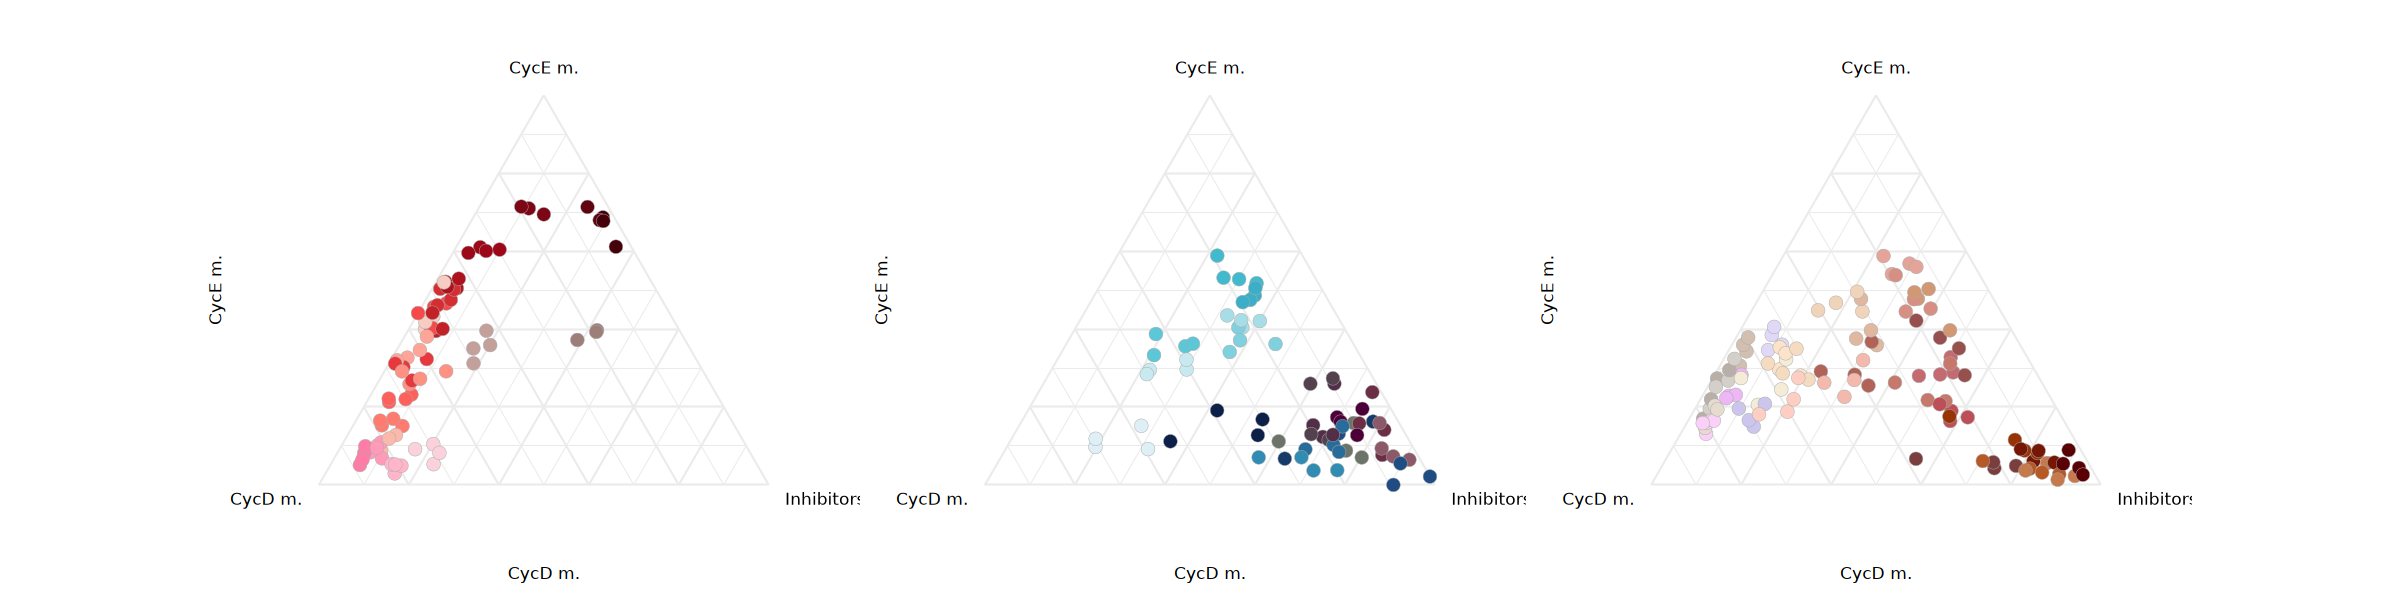

In [46]:
base_theme <- theme_bw(base_size = 10) + theme(legend.position = "none")

p1 <- triangle_plot_1 + base_theme
p2 <- triangle_plot_2 + base_theme
p3 <- triangle_plot_3 + base_theme

fig(20, 5)
p1 | p2 | p3


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


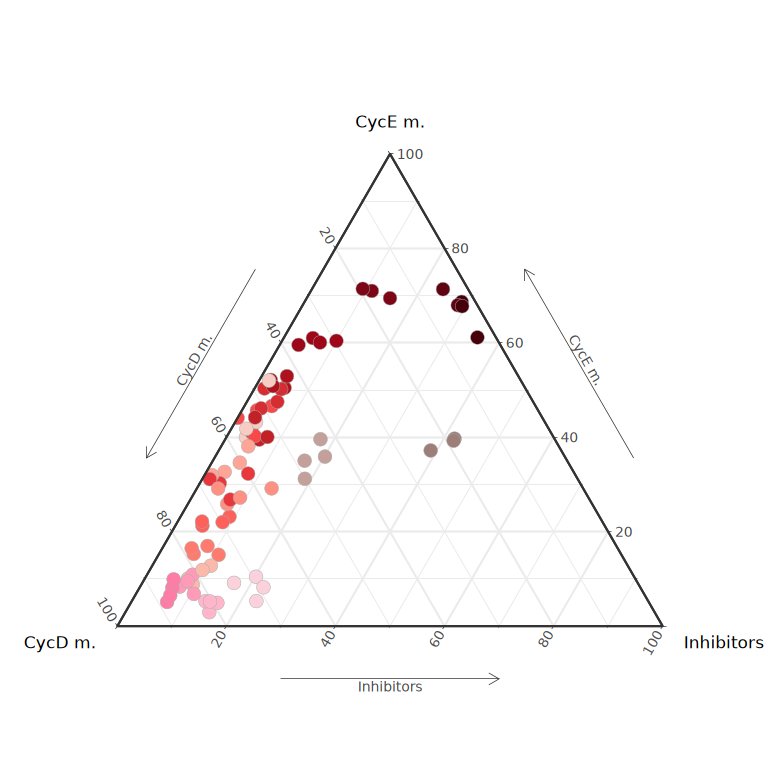

In [47]:
fig(6.5,6.5)

ery = p1+theme_showarrows() 
ery

In [48]:
ggsave("./data/Revision_Zhang_triangle_plot_ery.pdf", 
       ery, width = 6.5, 
       height = 6.5)


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


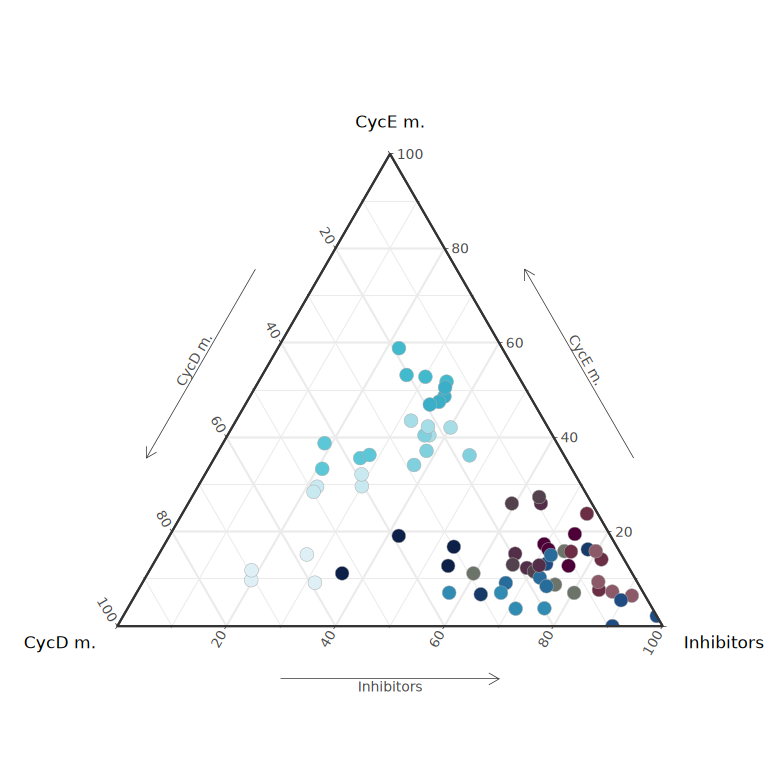

In [49]:
fig(6.5,6.5)

ly = p2+theme_showarrows() 
ly

In [50]:
ggsave("./data/Revision_Zhang_triangle_plot_ly.pdf", 
       ly, width = 6.5, 
       height = 6.5)


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


In [ ]:
head(sampleinfo)

Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


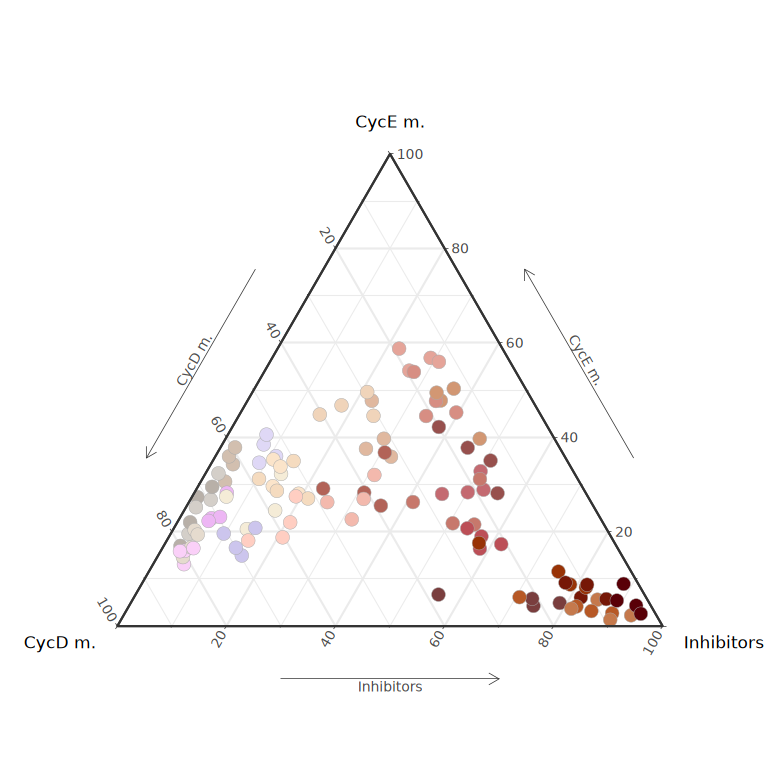

In [51]:
fig(6.5,6.5)

my = p3+theme_showarrows() 
my

In [52]:
ggsave("./data/Revision_Zhang_triangle_plot_my.pdf", 
       my, width = 6.5, 
       height = 6.5)


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


In [53]:
head(combined_df)

sample          CycD      CycE       Inhibitors donor_id cell_type  ancestry
1 BF21_ASDC       0.2646318 0.27988793 0.4554803  BF21     ASDC       African 
2 BF21_B Memory-1 0.1476860 0.13163431 0.7206797  BF21     B Memory-1 African 
3 BF21_B Memory-2 0.2998559 0.06729631 0.6328478  BF21     B Memory-2 African 
4 BF21_CD4 TCM    0.1304655 0.17357268 0.6959618  BF21     CD4 TCM    African 
5 BF21_CD8 TEM    0.0932793 0.25992207 0.6467986  BF21     CD8 TEM    African 
6 BF21_cDC1       0.4060057 0.28265708 0.3113372  BF21     cDC1       African 
  sex    age    Level 1   Level 2    Level 3 Multimodal Donor psbulk_n_cells
1 Female 21 yrs Dendritic ASDC       ASDC               BF21  152           
2 Female 21 yrs B cell    B cell     B Memory-1         BF21   80           
3 Female 21 yrs B cell    B cell     B Memory-2         BF21   16           
4 Female 21 yrs T/NK      CD4 T-cell CD4 TCM            BF21  306           
5 Female 21 yrs T/NK      T/NK       CD8 TEM            BF21  349           
6 Female 21 yrs Dendritic cDC        cDC1               BF21  195           
  psbulk_counts color  
1 2148775       #fbd1dc
2  463991       #ffb6ca
3  134826       #ff9bb9
4 2315872       #ff7ca6
5 1644616       #FAD0F8
6 3826214       #ffcec2

In [54]:
head(combined_df_orig)

sample          avg_zscore donor_id cell_type  ancestry sex    age   
1 BF21_ASDC       -0.4987927 BF21     ASDC       African  Female 21 yrs
2 BF21_B Memory-1 -0.7405587 BF21     B Memory-1 African  Female 21 yrs
3 BF21_B Memory-2 -0.6394904 BF21     B Memory-2 African  Female 21 yrs
4 BF21_CD4 TCM    -0.6979991 BF21     CD4 TCM    African  Female 21 yrs
5 BF21_CD8 TEM    -0.8039530 BF21     CD8 TEM    African  Female 21 yrs
6 BF21_cDC1       -0.4695910 BF21     cDC1       African  Female 21 yrs
  Level 1   Level 2    Level 3 Multimodal Donor psbulk_n_cells psbulk_counts
1 Dendritic ASDC       ASDC               BF21  152            2148775      
2 B cell    B cell     B Memory-1         BF21   80             463991      
3 B cell    B cell     B Memory-2         BF21   16             134826      
4 T/NK      CD4 T-cell CD4 TCM            BF21  306            2315872      
5 T/NK      T/NK       CD8 TEM            BF21  349            1644616      
6 Dendritic cDC        cDC1               BF21  195            3826214      
  prop2div   
1 0.070433989
2 0.019903193
3 0.041027186
4 0.028798464
5 0.006653347
6 0.076537331

In [55]:
#sampleinfo

In [56]:
combined_df <- combined_df %>%
  left_join(
    combined_df_orig %>%
      select(sample, prop2div),
    by = "sample"
  )

In [57]:
head(combined_df)

sample          CycD      CycE       Inhibitors donor_id cell_type  ancestry
1 BF21_ASDC       0.2646318 0.27988793 0.4554803  BF21     ASDC       African 
2 BF21_B Memory-1 0.1476860 0.13163431 0.7206797  BF21     B Memory-1 African 
3 BF21_B Memory-2 0.2998559 0.06729631 0.6328478  BF21     B Memory-2 African 
4 BF21_CD4 TCM    0.1304655 0.17357268 0.6959618  BF21     CD4 TCM    African 
5 BF21_CD8 TEM    0.0932793 0.25992207 0.6467986  BF21     CD8 TEM    African 
6 BF21_cDC1       0.4060057 0.28265708 0.3113372  BF21     cDC1       African 
  sex    age    Level 1   Level 2    Level 3 Multimodal Donor psbulk_n_cells
1 Female 21 yrs Dendritic ASDC       ASDC               BF21  152           
2 Female 21 yrs B cell    B cell     B Memory-1         BF21   80           
3 Female 21 yrs B cell    B cell     B Memory-2         BF21   16           
4 Female 21 yrs T/NK      CD4 T-cell CD4 TCM            BF21  306           
5 Female 21 yrs T/NK      T/NK       CD8 TEM            BF21  349           
6 Female 21 yrs Dendritic cDC        cDC1               BF21  195           
  psbulk_counts color   prop2div   
1 2148775       #fbd1dc 0.070433989
2  463991       #ffb6ca 0.019903193
3  134826       #ff9bb9 0.041027186
4 2315872       #ff7ca6 0.028798464
5 1644616       #FAD0F8 0.006653347
6 3826214       #ffcec2 0.076537331

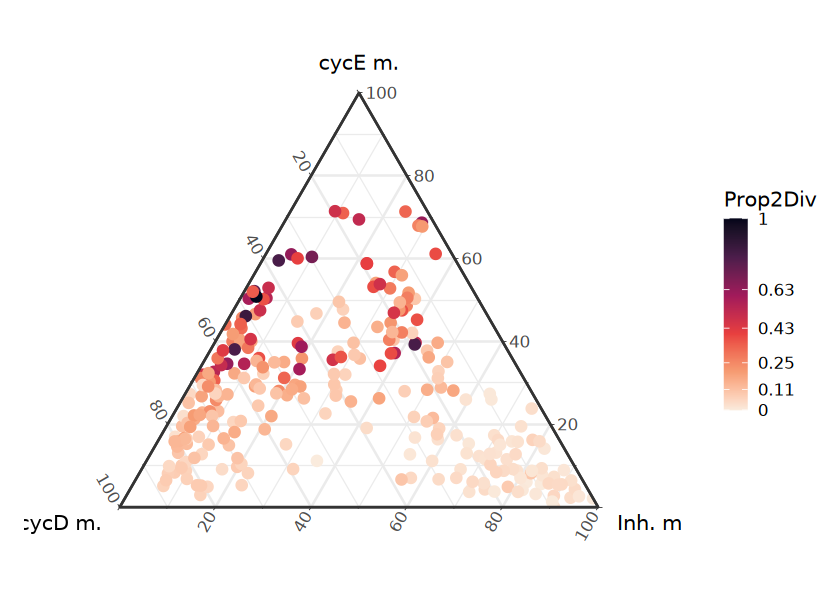

In [88]:
library(scales)  # for squish

fig(7, 5)

triangle <- ggtern(data = combined_df, 
       aes(x = CycD, y = CycE, z = Inhibitors, color = prop2div)) + 
  geom_point(size = 2.5) +  # shape 16 is default
  scale_color_viridis_c(
    option = "rocket",
    direction = -1,
   breaks = jenks_breaks,
    labels = round(jenks_breaks, 2),
    name = "Prop2Div"
  ) +
  labs(
    x = "cycD m.",
    y = "cycE m.",
    z = "Inh. m"
  ) +
  theme_bw() +
  guides(color = guide_colorbar(barwidth = 1, barheight = 8))

triangle

In [89]:
ggsave("./data/Revision_Zhang_triangle_plot_Pd_bar.pdf", 
       my, width = 6.5, 
       height = 6.5)


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


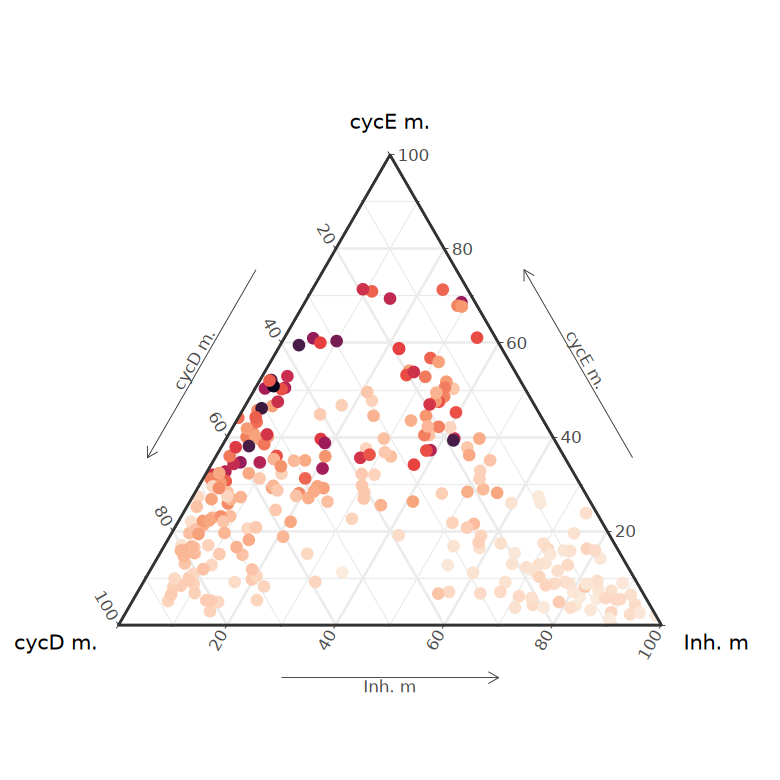

In [92]:
fig(6.5,6.5)

pdtriangle = triangle+theme_showarrows()+ theme(legend.position = "none")
pdtriangle

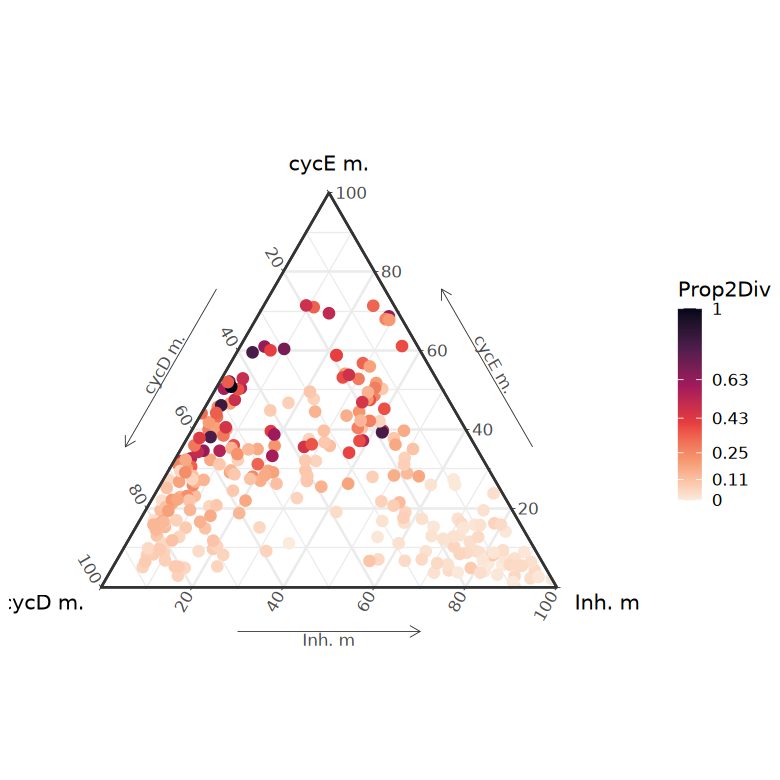

In [94]:
pdtriangle = triangle+theme_showarrows()#+ theme(legend.position = "none")
pdtriangle

In [95]:
ggsave("./data/Revision_Zhang_triangle_plot_Pd_bar_v2.pdf", 
       pdtriangle, width = 6.5, 
       height = 6.5)


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


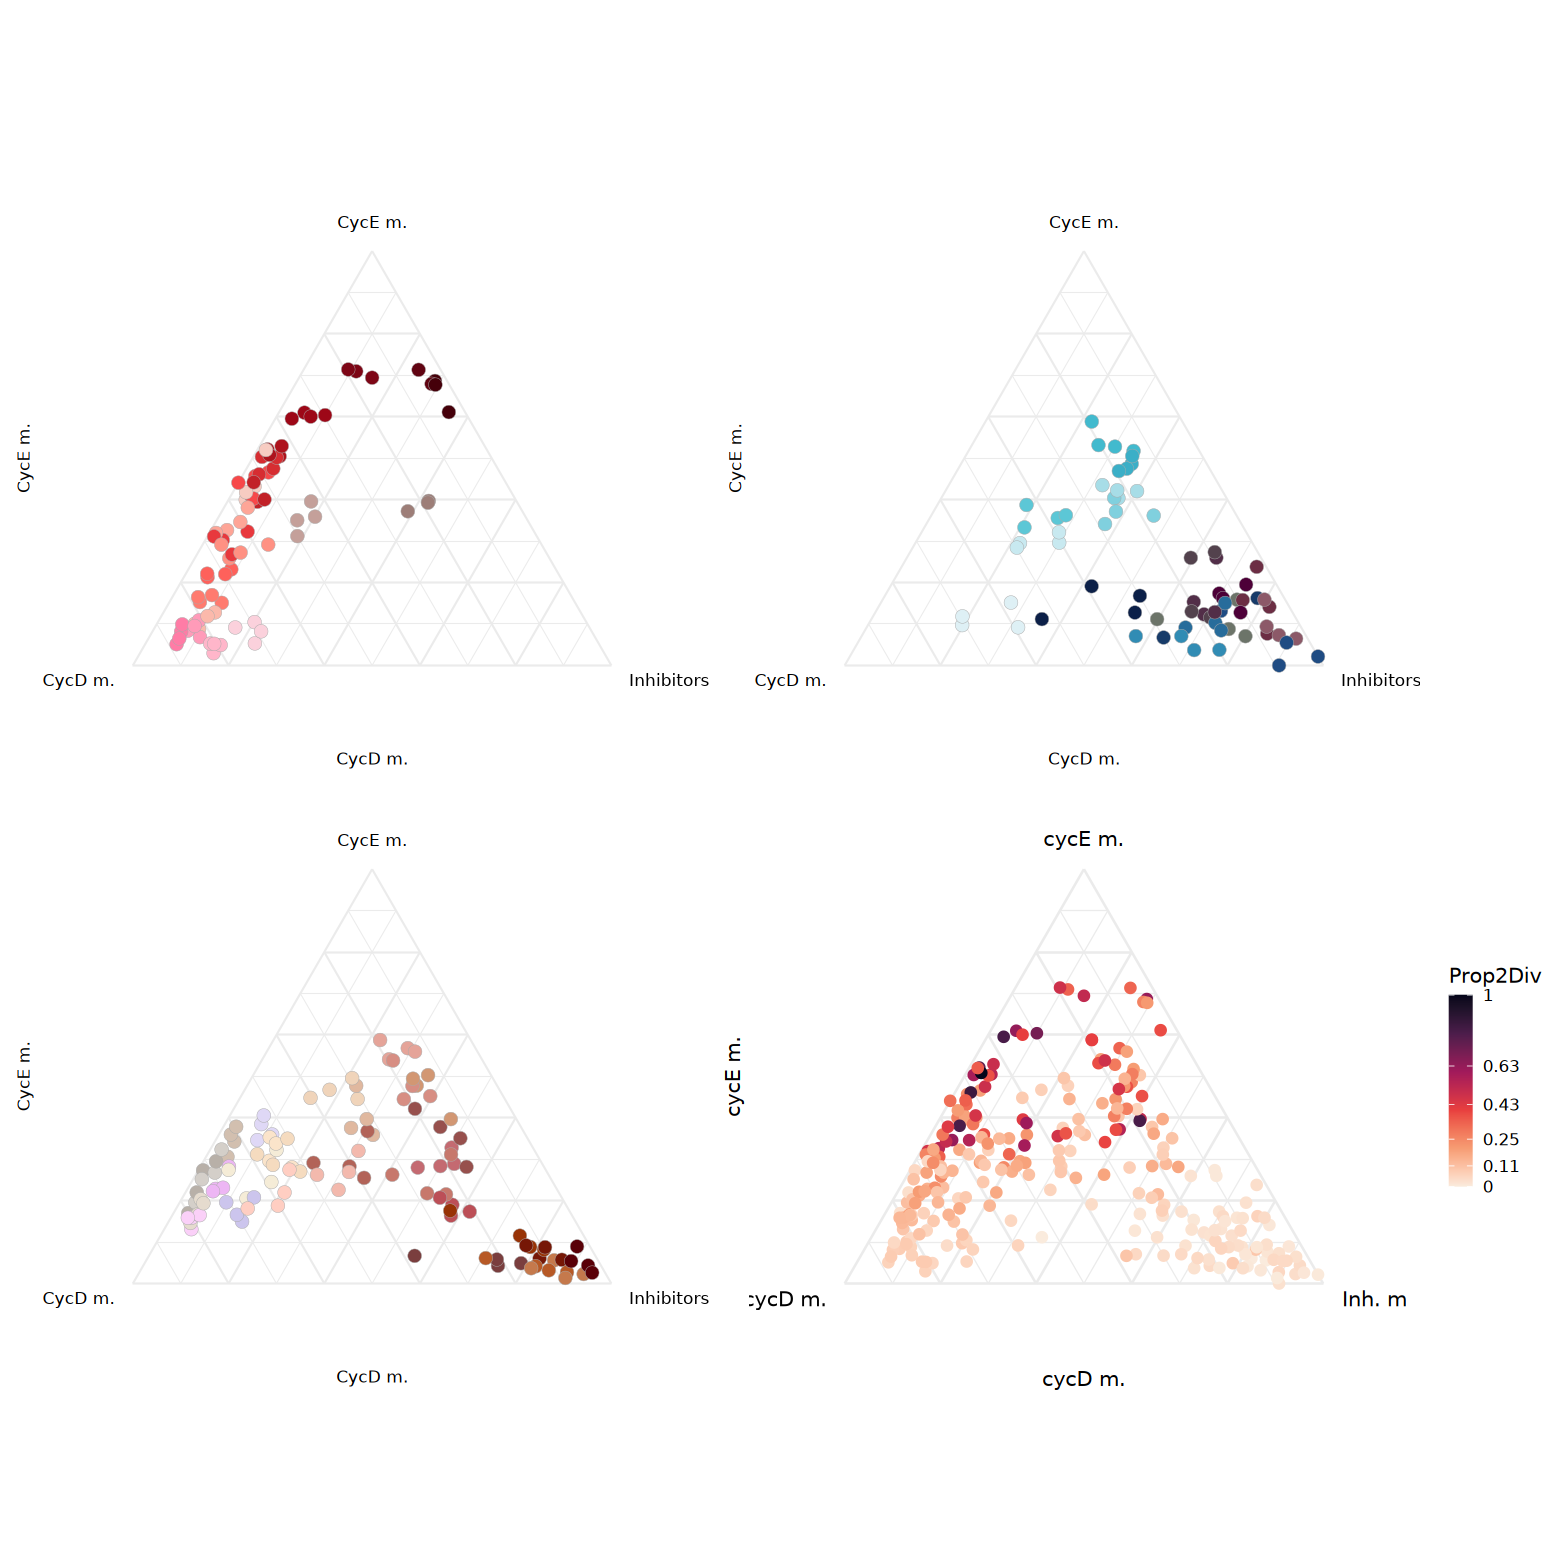

In [85]:
fig(13, 13)
plot = ery+ly+my+triangle +
  theme_bw()

plot

In [87]:
ggsave("./data/Revision_Zhang_triangle_plot_all4.pdf", 
       plot, width = 14, 
       height = 14)


Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”
Warning message:
“No shared levels found between `names(values)` of the manual scale and the data's
colour values.”


# custom concentrations (Fig 6-7)

In [96]:
total_gene_conc_data <- read.csv("./data/total_gene_conc_data3_Zhang.csv", 
                                 stringsAsFactors = FALSE)

head(total_gene_conc_data, n=2)

sample          totalE2F_norm_sum totalRB_norm_sum totalRB1_norm_sum
1 BF21_ASDC       95.654790         544.5871         249.9384         
2 BF21_B Memory-1  7.851148         308.7478         144.7484         
  totalCDKN_norm_sum totalCDKN1_norm_sum totalCDK246_norm_sum
1 390.5596           73.95520            489.51800           
2 161.8475           91.58104             35.98787           
  totalCDK46_norm_sum totalE2F_raw totalRB_raw totalRB1_raw totalCDKN_raw
1 483.84482           138          804         352          545          
2  31.44449             4          171          81           90          
  totalCDKN1_raw totalCDK246_raw totalCDK46_raw total_cells total_RNA
1 106            736             727            152         2148775  
2  49             22              20             80          463991

In [97]:
library(dplyr)

mrg <- combined_df %>%
  select(sample, prop2div, cell_type) %>%
  inner_join(total_gene_conc_data, by = "sample")

mrg$cell_type <- factor(mrg$cell_type, levels = labelorder)


Warning message:
“The `size` argument of `element_line()` is deprecated as of ggplot2 3.4.0.
ℹ Please use the `linewidth` argument instead.”


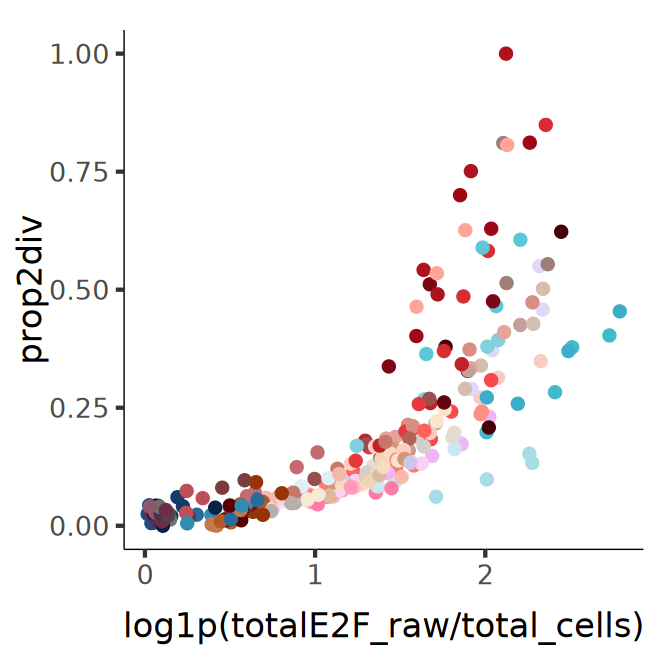

In [98]:
scatter_plot <- ggplot(mrg, 
                       aes(x = log1p(totalE2F_raw/total_cells), 
                           y = prop2div, color = cell_type)) +
  geom_point(size = 3, stroke = 0.5) +  
  scale_color_manual(values = colorcode) +  
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 20), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 0.3),
      axis.line.y = element_line(size = 0.3)
    ) +
    labs(fill = "Cell type") +
    guides(
      fill = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 22, size = 5, stroke = 0)  # squares in legend
      ))

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot

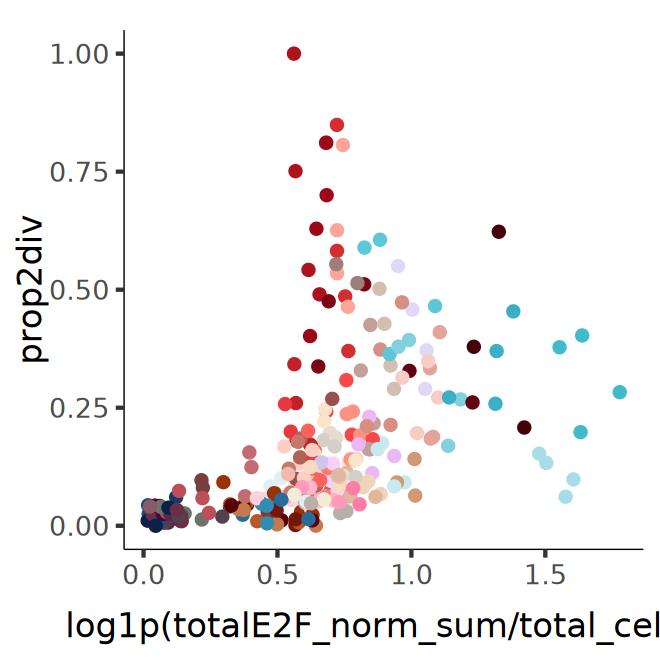

In [99]:
scatter_plot <- ggplot(mrg, 
                       aes(x = log1p(totalE2F_norm_sum/total_cells), 
                           y = prop2div, color = cell_type)) +
  geom_point(size = 3, stroke = 0.5) +  
  scale_color_manual(values = colorcode) +  
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 20), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 0.3),
      axis.line.y = element_line(size = 0.3)
    ) +
    labs(fill = "Cell type") +
    guides(
      fill = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 22, size = 5, stroke = 0)  # squares in legend
      ))

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot

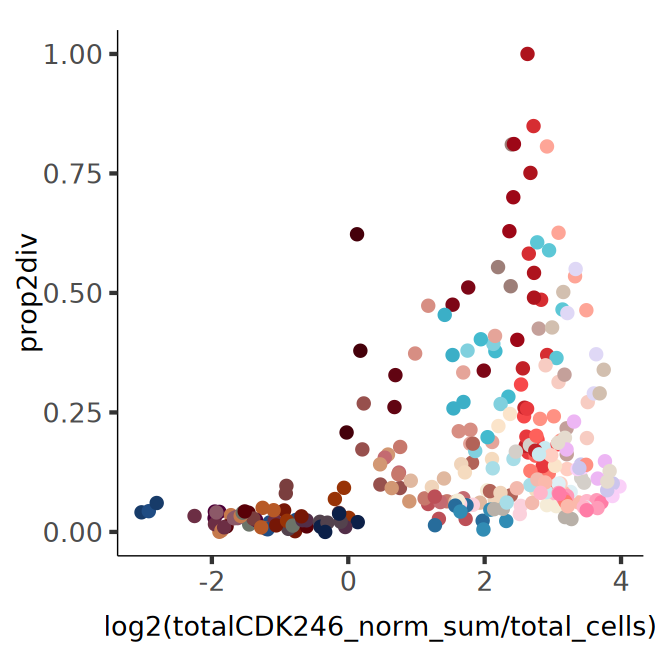

In [100]:
scatter_plot <- ggplot(mrg, 
                       aes(x = log2(totalCDK246_norm_sum/total_cells), 
                           y = prop2div, 
                           
                           color = cell_type)) +
  geom_point(size = 3, stroke = 0.5) +  # Customize point size and border
  scale_color_manual(values = colorcode) +  # Use Level 3M colors
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 16), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 0.3),
      axis.line.y = element_line(size = 0.3)
    ) +
    labs(fill = "Cell type") +
    guides(
      fill = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 22, size = 5, stroke = 0) 
      ))

fig(5.5,5.5)
scatter_plot = scatter_plot + theme(legend.position="none")
scatter_plot

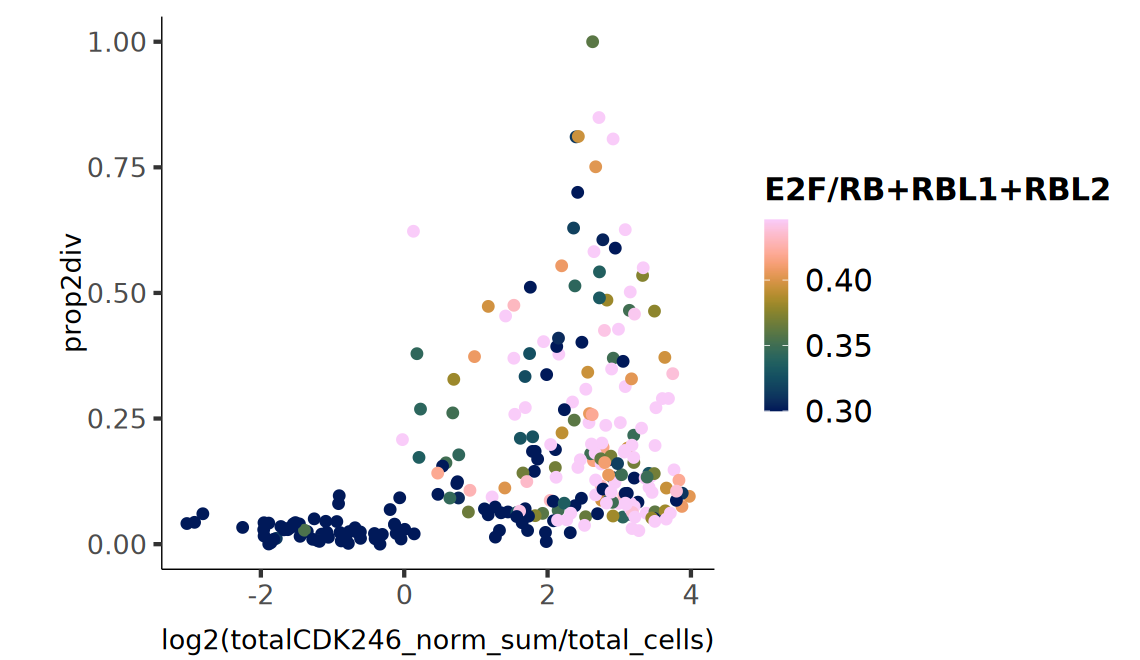

In [102]:
ratio_vals <- mrg$totalE2F_raw / mrg$totalRB_raw
upper_limit <- quantile(ratio_vals, 0.75, na.rm = TRUE)


library(scico)

#upper_limit <- 1

scatter_plot <- ggplot(mrg, 
                       aes(x = log2(totalCDK246_norm_sum / total_cells), 
                           y = prop2div, 
                           color = totalE2F_raw / totalRB_raw)) +
  geom_point(shape = 16, size = 3) +
  scale_color_scico(
    palette = "batlow",
    direction = 1,
    name = "E2F/RB+RBL1+RBL2",
    limits = c(0.3, upper_limit),  # tune this if needed
    oob = scales::squish
  ) +
  theme_classic(base_size = 20, base_family = "sans") +
  theme(
    aspect.ratio = 1,
    axis.text = element_text(size = 16), 
    axis.title = element_text(size = 16), 
    axis.title.x = element_text(vjust = -1),
    plot.title = element_text(hjust = 0.5, size = 26, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
    legend.title = element_text(color = "black", size = 18, face = "bold"), 
    legend.text = element_text(color = "black", size = 18),
    axis.line.x = element_line(size = 0.3),
    axis.line.y = element_line(size = 0.3)
  ) +
  guides(color = guide_colorbar(barwidth = 1, barheight = 8)) +
  coord_fixed()

fig(9.5,5.5)
scatter_plot = scatter_plot #+ theme(legend.position="none")
scatter_plot


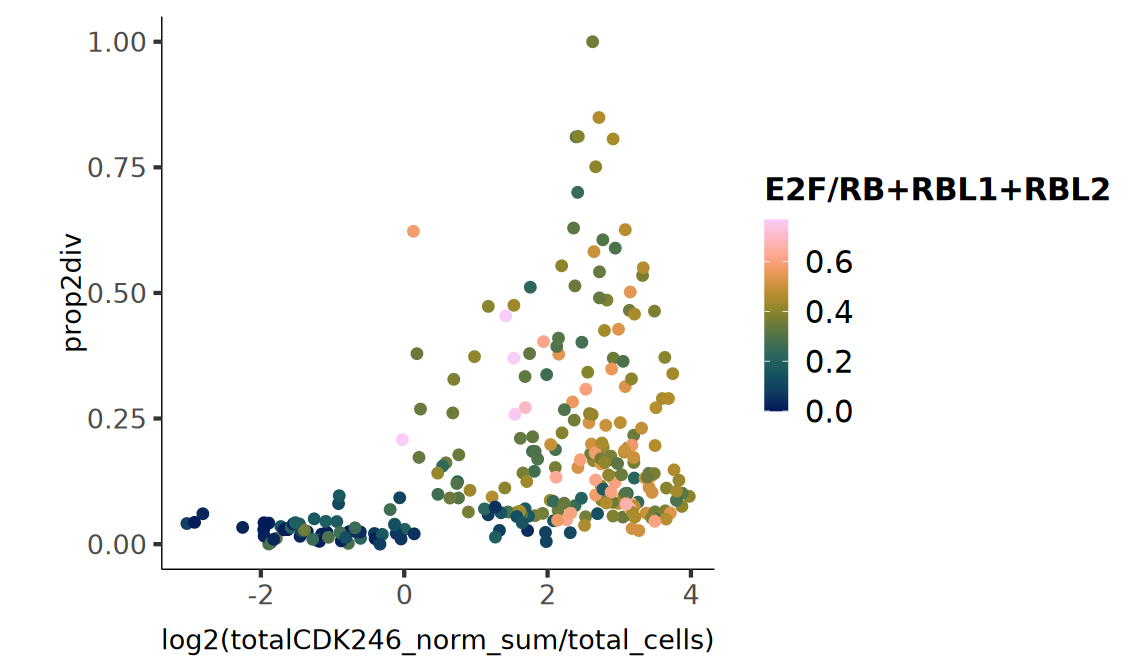

In [103]:
ratio_vals <- mrg$totalE2F_raw / mrg$totalRB_raw
upper_limit <- quantile(ratio_vals, 0.99, na.rm = TRUE)

#upper_limit <- 1

scatter_plot <- ggplot(mrg, 
                       aes(x = log2(totalCDK246_norm_sum / total_cells), 
                           y = prop2div, 
                           color = totalE2F_raw / totalRB_raw)) +
  geom_point(shape = 16, size = 3) +
  scale_color_scico(
    palette = "batlow",
    direction = 1,
    name = "E2F/RB+RBL1+RBL2",
    limits = c(0, upper_limit), 
    oob = scales::squish
  ) +
  theme_classic(base_size = 20, base_family = "sans") +
  theme(
    aspect.ratio = 1,
    axis.text = element_text(size = 16), 
    axis.title = element_text(size = 16), 
    axis.title.x = element_text(vjust = -1),
    plot.title = element_text(hjust = 0.5, size = 26, face = "bold"),
    plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
    legend.title = element_text(color = "black", size = 18, face = "bold"), 
    legend.text = element_text(color = "black", size = 18),
    axis.line.x = element_line(size = 0.3),
    axis.line.y = element_line(size = 0.3)
  ) +
  guides(color = guide_colorbar(barwidth = 1, barheight = 8)) +
  coord_fixed()

fig(9.5,5.5)
scatter_plot = scatter_plot #+ theme(legend.position="none")
scatter_plot


In [105]:
head(sampleinfo)

sample          donor_id cell_type  ancestry sex    age    Level 1   Level 2
1 BF21_ASDC       BF21     ASDC       African  Female 21 yrs Dendritic ASDC   
2 BM27_ASDC       BM27     ASDC       African  Male   27 yrs Dendritic ASDC   
3 WF26_ASDC       WF26     ASDC       European Female 26 yrs Dendritic ASDC   
4 WM34_ASDC       WM34     ASDC       European Male   34 yrs Dendritic ASDC   
5 BF21_B Memory-1 BF21     B Memory-1 African  Female 21 yrs B cell    B cell 
6 BM27_B Memory-1 BM27     B Memory-1 African  Male   27 yrs B cell    B cell 
  Level 3 Multimodal Donor psbulk_n_cells psbulk_counts
1 ASDC               BF21  152            2148775      
2 ASDC               BM27  132            3315025      
3 ASDC               WF26  106            1618018      
4 ASDC               WM34  193            6336434      
5 B Memory-1         BF21   80             463991      
6 B Memory-1         BM27   62             579662

# Heatmap

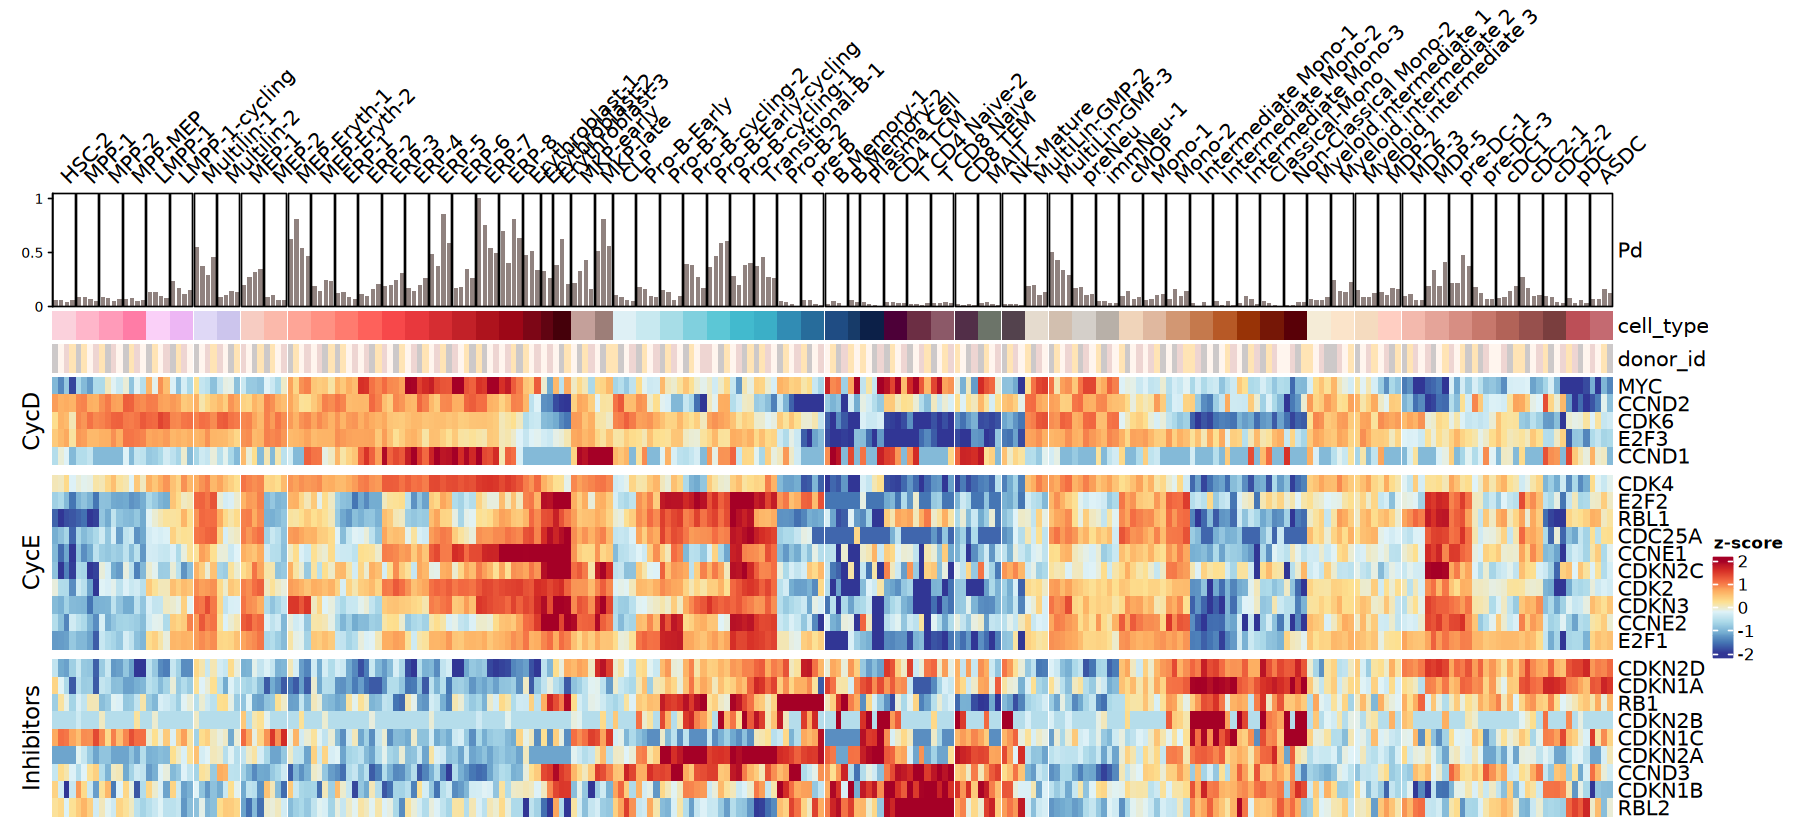

In [133]:
library(dplyr)
library(ComplexHeatmap)
library(circlize)
library(grid)

# 1) Pd vector aligned to heatmap columns
pd_map <- combined_df %>%
  select(sample, prop2div) %>%
  distinct()

pd_vec <- pd_map$prop2div[ match(colnames(scaledata_matrix_ordered), pd_map$sample) ]
stopifnot(length(pd_vec) == ncol(scaledata_matrix_ordered))
if (any(is.na(pd_vec))) {
  warning("Some samples missing prop2div")
  pd_vec[is.na(pd_vec)] <- 0
}

# 2) col annotation df
stopifnot(nrow(sampleinfo_filtered) == ncol(scaledata_matrix_ordered))

ann <- data.frame(
  cell_type = droplevels(sampleinfo_filtered$cell_type),
  donor_id  = droplevels(sampleinfo_filtered$donor_id)
)

colours <- list(
  cell_type = colorcode,
  donor_id  = c(
    "BF21" = "seashell",
    "BM27" = "snow3",
    "WF26" = "mistyrose2",
    "WM34" = "moccasin"
  )
)

top_ann <- HeatmapAnnotation(
  Pd = anno_barplot(
    pd_vec,
    axis = TRUE,
    gp = gpar(border = FALSE, fill = "#90827F", lty = "blank"),
    height = unit(2.4, "cm")
  ),
  df  = ann,           
  col = colours,       
  annotation_height = unit.c(unit(2.4, "cm"), unit(0.6, "cm"), unit(0.6, "cm")),
  gap = unit(1, "mm"),
  show_legend = FALSE,  
  annotation_name_side = "right"
)

ht <- Heatmap(
  scaledata_matrix_ordered,
  name = "z-score",
  column_split = ann$cell_type,
  row_split = factor(gene_to_module_ordered, levels = c("CycD", "CycE", "Inhibitors")),
  cluster_rows = FALSE,
  cluster_columns = TRUE,
  cluster_row_slices = FALSE,
  cluster_column_slices = FALSE,
  show_row_dend = FALSE,
  show_column_dend = FALSE,
  column_title_gp = gpar(fontsize = 12),
  row_names_gp = gpar(fontsize = 12, family = "Sans", fontface = "italic"),
  column_gap = unit(0.25, "mm"),
  row_gap = unit(2.2, "mm"),
  col = col,   # your RdYlBu palette
  column_names_gp = gpar(fontsize = 15),
  column_title_rot = 45,
  show_column_names = FALSE,
  top_annotation = top_ann
)

fig(15, 7)
draw(ht, padding = unit(c(5, 5, 5, 5), "mm"))


In [134]:
pdf("./data/Revision_Zhang_heatmap_Zhang4donors.pdf", width = 15, height = 7)
draw(ht, padding = unit(c(5, 5, 5, 5), "mm"))
dev.off()


pdf 
  2

## PCA - 24 cell types

In [135]:
library(tidyverse)
library(data.table)
library(matrixStats)
library(ggplot2)
library(anndata)
library(edgeR)
library(scales)
#library(knitr)
#library(viridis)
#library(ComplexHeatmap)
#library(circlize)
#library(ggcorrplot)
#library(ggtern)
library(RColorBrewer)
#library(corrplot)

#to be able to adjust figs
fig <- function(width, heigth){
options(repr.plot.width = width, repr.plot.height = heigth) }

set.seed(42)
Sys.time()
Sys.getenv("CONDA_DEFAULT_ENV")

[1] "2025-09-14 17:31:02 EEST"

[1] "traj_inf"

In [136]:
ad <- read_h5ad ("/research/work/andreha/privat/Andrea/2025_Sylvain/data/pdata_Zhang2024_Level1.h5ad")

ad$obs$cell_type =  as.factor(ad$obs$`Level 2`)
#ad$obs$cell_type_Level1 =  as.factor(ad$obs$"Level 1")

In [137]:
#----------
MIN_CELLS = 10
MIN_READS =50000 #50.000 as in EdgeR notebook

keep.samples <-  ad$obs$psbulk_n_cells >= MIN_CELLS
table(keep.samples)

ad_filtr <- subset(ad, ad$obs$psbulk_n_cells >= MIN_CELLS)
keep.samples <-  ad_filtr$obs$psbulk_counts >= MIN_READS
table(keep.samples)

ad_filtr <- subset(ad_filtr, ad_filtr$obs$psbulk_counts >= MIN_READS)
ad_filtr

keep.samples
FALSE  TRUE 
    1   101 

keep.samples
TRUE 
 101 

View of AnnData object with n_obs × n_vars = 101 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 2', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [138]:
cell_type_counts <- ad_filtr$obs %>%
  group_by(cell_type) %>%
  summarise(donor_count = n_distinct(donor_id))

low_donor_cell_types <- cell_type_counts %>%
  filter(donor_count < 2) %>%
  pull(cell_type)

ad_filtr <- subset(ad_filtr, !ad_filtr$obs$cell_type %in% low_donor_cell_types)

In [139]:
ad_filtr

View of AnnData object with n_obs × n_vars = 100 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 2', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [140]:
low_donor_cell_types

[1] Mac
26 Levels: ASDC B cell Ba/Ma/Eo CD4 T-cell CLP GMP HSC MDP MEP MKP MPP ... pre-DC

In [141]:
cell_type_counts <- ad_filtr$obs %>%
  group_by(cell_type) %>%
  summarise(n_donors = n_distinct(donor_id)) %>%
  arrange(desc(n_donors)) 

cell_type_counts

cell_type            n_donors
1  ASDC                 4       
2  B cell               4       
3  Ba/Ma/Eo             4       
4  CD4 T-cell           4       
5  CLP                  4       
6  GMP                  4       
7  HSC                  4       
8  MDP                  4       
9  MEP                  4       
10 MKP                  4       
11 MPP                  4       
12 Monocyte             4       
13 MultiLin             4       
14 Myeloid intermediate 4       
15 Plasma Cell          4       
16 T/NK                 4       
17 Transitional-B       4       
18 cDC                  4       
19 early-Erythroid      4       
20 early-Mono           4       
21 early-Neu            4       
22 late-Erythroid       4       
23 pDC                  4       
24 pre-B                4       
25 pre-DC               4

In [142]:
ad_filtr <- subset(ad_filtr, 
                   !ad_filtr$obs$cell_type %in% "Ba/Ma/Eo")

In [143]:
levels(ad_filtr$obs$cell_type) 
ad_filtr$obs$cell_type <- factor(ad_filtr$obs$cell_type) 
nlevels(ad_filtr$obs$cell_type) 

[1] "ASDC"                 "B cell"               "CD4 T-cell"          
 [4] "CLP"                  "GMP"                  "HSC"                 
 [7] "MDP"                  "MEP"                  "MKP"                 
[10] "MPP"                  "Monocyte"             "MultiLin"            
[13] "Myeloid intermediate" "Plasma Cell"          "T/NK"                
[16] "Transitional-B"       "cDC"                  "early-Erythroid"     
[19] "early-Mono"           "early-Neu"            "late-Erythroid"      
[22] "pDC"                  "pre-B"                "pre-DC"

[1] 24

In [144]:
#Sun test

colorcode <- c(

  "HSC"   = "#ffb6ca",   
  "MPP" = "#ff7ca6",   
  "MultiLin" = "#CCC5ED",  
  "MEP" = "#ffa799",
  "early-Erythroid" = "#fe625b",
  "late-Erythroid" = "#ac131f",
  "MKP" = "#C4A09A",    
  "CLP" = "#a7dde7",  
  "Transitional-B" = "#3bafc7",  
  "pre-B" = "#276C9B",   
  "B cell" = "#173B69",  
  "Plasma Cell" = "#0C2048",  
  "CD4 T-cell" = "#6C2E44",  
  "T/NK" = "#522E48",  
   "GMP" = "#D2BFAF",  
  "early-Neu"    = "#d4cfc9",   
  "Myeloid intermediate" = "#F5DBBF",  
  "early-Mono" = "#E0B89F",  
  "Monocyte" = "#983306",  
  "MDP"     = "#f3b9ad",
  "pre-DC"  = "#d78e83",
  "cDC"    = "#97504d",
  "ASDC" = "#C46A71",  
  "pDC" = "#BC4F57"  
)
labelorder = names (colorcode)

In [145]:
sampleinfo = ad$obs
sampleinfo$cell_type <- factor(sampleinfo$cell_type, levels = labelorder)


In [146]:
x = t(ad_filtr$X)
head(x)

sampleinfo = ad_filtr$obs %>%
#select (., -c("sample")) %>%
rownames_to_column ("sample")

sampleinfo$cell_type <- droplevels(sampleinfo$cell_type)
#head(sampleinfo)

BF21_ASDC BM27_ASDC WF26_ASDC WM34_ASDC BF21_B cell BM27_B cell
A1BG     83        111       57        216       15          14         
A1BG-AS1  6         11        5         12        1           0         
A1CF      0          0        0          0        0           0         
A2M       2          4        1          8        1           0         
A2M-AS1   1          1        2         10        0           0         
A2ML1     0          0        0          3        0           0         
         WF26_B cell WM34_B cell BF21_CD4 T-cell BM27_CD4 T-cell ⋯ WF26_pDC
A1BG     5           17          157             532             ⋯ 468     
A1BG-AS1 1            2           18              37             ⋯  50     
A1CF     0            0            0               3             ⋯   0     
A2M      0            1          114             151             ⋯   2     
A2M-AS1  0            0           18              24             ⋯   5     
A2ML1    0            0            1               5             ⋯   0     
         WM34_pDC BF21_pre-B BM27_pre-B WF26_pre-B WM34_pre-B BF21_pre-DC
A1BG     787      690        970        307        1709       381        
A1BG-AS1  64      179        215        118         518        33        
A1CF       0        0          1          0           0         0        
A2M        7       15         20          2          24         7        
A2M-AS1   22        9         11          4          10         9        
A2ML1      3        2          6          2           2         1        
         BM27_pre-DC WF26_pre-DC WM34_pre-DC
A1BG     567         428         572        
A1BG-AS1  66          30          71        
A1CF       0           0           0        
A2M       19           7          17        
A2M-AS1   14          16          15        
A2ML1      1           0           2

In [147]:
table(colnames(x)==sampleinfo$sample)

y <- DGEList (counts =x, 
              group = sampleinfo$cell_type, 
              genes = rownames (x))

keep <- filterByExpr(y)
table(keep)



TRUE 
  96 

keep
FALSE  TRUE 
12834 20518 

In [148]:
y <- calcNormFactors(y, method = "TMM") #default in TMM
head(y$samples)

min (y$samples$norm.factors)
max (y$samples$norm.factors)

#cpm <- cpm(y, normalized.lib.sizes=TRUE)
logcpm <- cpm(y, log=TRUE,normalized.lib.sizes=TRUE)
#head (logcpm)

group  lib.size norm.factors
BF21_ASDC   ASDC   2148775  1.1706858   
BM27_ASDC   ASDC   3315025  1.0814274   
WF26_ASDC   ASDC   1618018  1.2163348   
WM34_ASDC   ASDC   6336434  0.9686738   
BF21_B cell B cell  598817  1.3353136   
BM27_B cell B cell  644818  1.2583315

[1] 0.511882

[1] 1.500751

In [149]:
G1Sgenes = c("CCND1","CCND2","CCND3","CCNE1","CCNE2", #cyclins
           "RB1","RBL1","RBL2", #RB related proteins
           "CDK2","CDK4","CDK6",
           "E2F1","E2F2","E2F3",
            "CDC25A","CDKN1A","CDKN1B","CDKN1C","CDKN2A","CDKN2B","CDKN2C","CDKN2D","CDKN3", "MYC")

logcpm_CC = logcpm[G1Sgenes,]
logcpm_CC_t = t(logcpm_CC)

pca <- prcomp((logcpm_CC_t), scale. = TRUE)

In [150]:
pca_df <- data.frame(pca$x[, 1], pca$x[, 2])

variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)

In [151]:
sampleinfo$cell_type <- factor(sampleinfo$cell_type, levels = labelorder)
colorcode <- colorcode[labelorder]

plotmypca <- function(data, variance_pc1, variance_pc2, colorcode, sampleinfo) {
  data$cell_type <- sampleinfo$cell_type  
  
  ggplot(data, 
         aes(x = pca.x...1., 
             y = pca.x...2.,
             color = cell_type)) + 
    geom_point(shape = 16, size = 4) +  
    xlab(paste0("PC1 (", variance_pc1, "%)")) +
    ylab(paste0("PC2 (", variance_pc2, "%)")) +
    scale_color_manual(values = colorcode) + 
    theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 20), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 1),
      axis.line.y = element_line(size = 1)
    ) +
    labs(color = "Cell type") +  
    guides(
      color = guide_legend(
        title = "Cell type",
        override.aes = list(shape = 16, size = 5)  
      )
    )
}


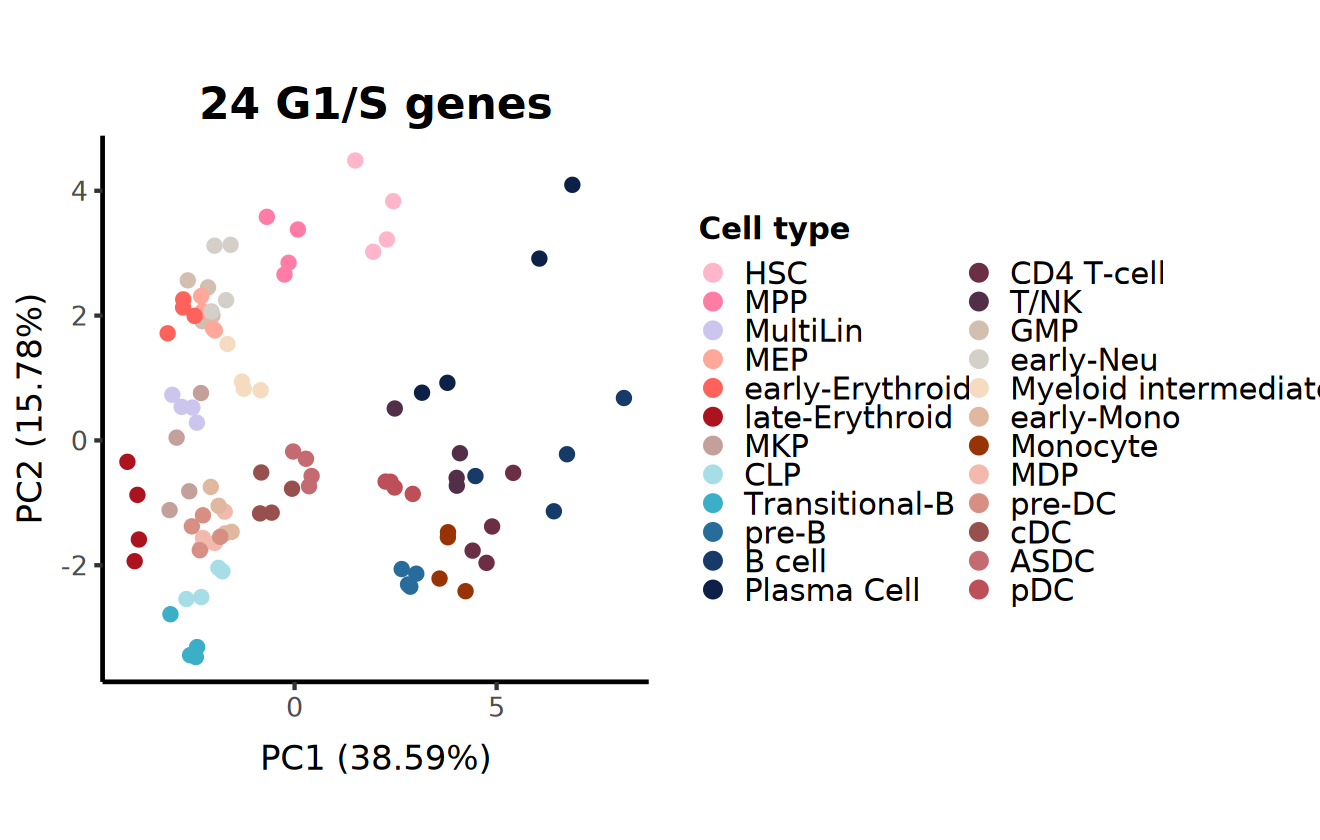

In [165]:
#--------
pca <- prcomp((logcpm_CC_t), scale. = TRUE)
pca_df <- data.frame(pca$x[, 1], pca$x[, 2])

variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)


fig (11,7)
pca_plot1 <- plotmypca(pca_df, variance_pc1, variance_pc2, colorcode, sampleinfo) +
  ggtitle("24 G1/S genes")

pca_plot1

#ggsave("pca_24_G1S_genes.pdf", plot = pca_plot, width = 11, height = 7, units = "in", dpi = 300)

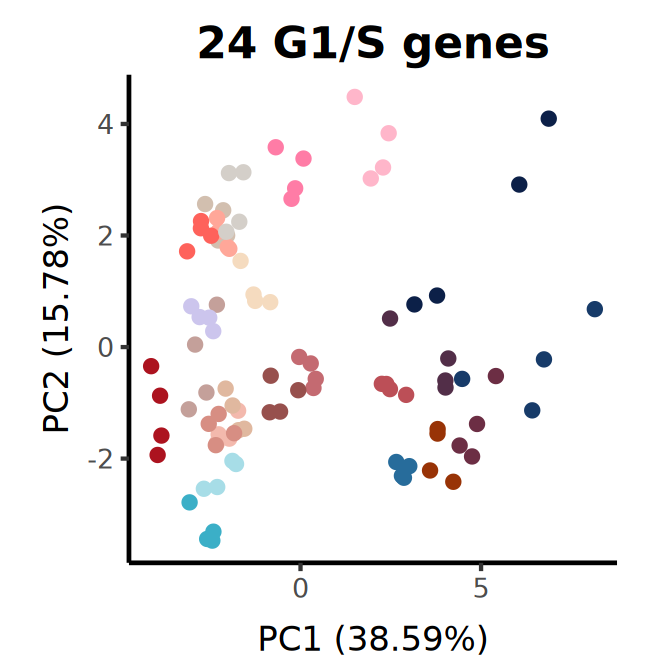

In [166]:
fig (5.5,5.5)

pca_plot1 = pca_plot1+theme(legend.position = "none")
pca_plot1

#ggsave("./data/pca_plot1.pdf", plot = pca_plot1, width = 5.5, height = 5.5)#, units = "in", dpi = 300)

In [154]:
ggsave("./data/Revision_Zhang_pca_plot1.pdf", plot = pca_plot1, width = 5.5, height = 5.5)#, units = "in", dpi = 300)


In [167]:
pca_CC24 = pca_df %>%
rename (., "x" = "pca.x...1.", 
        "y" = "pca.x...2."
       )%>%
rownames_to_column ("sample")
head(pca_CC24)

sample      x          y         
1 BF21_ASDC    0.3586843 -0.7336666
2 BM27_ASDC    0.4216812 -0.5700875
3 WF26_ASDC   -0.0362748 -0.1775623
4 WM34_ASDC    0.2826525 -0.2939797
5 BF21_B cell  4.4760432 -0.5709947
6 BM27_B cell  8.1507761  0.6795570

In [168]:
write.csv(pca_CC24, "./data/Revision_Zhang_pca_CC24.csv", row.names = FALSE)

In [169]:
m = as.matrix(logcpm)

#https://support.bioconductor.org/p/9148563/

o <- order(rowVars(m), decreasing = TRUE)
cpm_ordered <- m[o,]

vargenes = rownames(cpm_ordered[1:24,])

cpm_ordered = cpm_ordered[vargenes,]
cpm_ordered_t = t(cpm_ordered)

pca <- prcomp((cpm_ordered_t), scale. = TRUE)
pca_df <- data.frame(pca$x[, 1], pca$x[, 2])

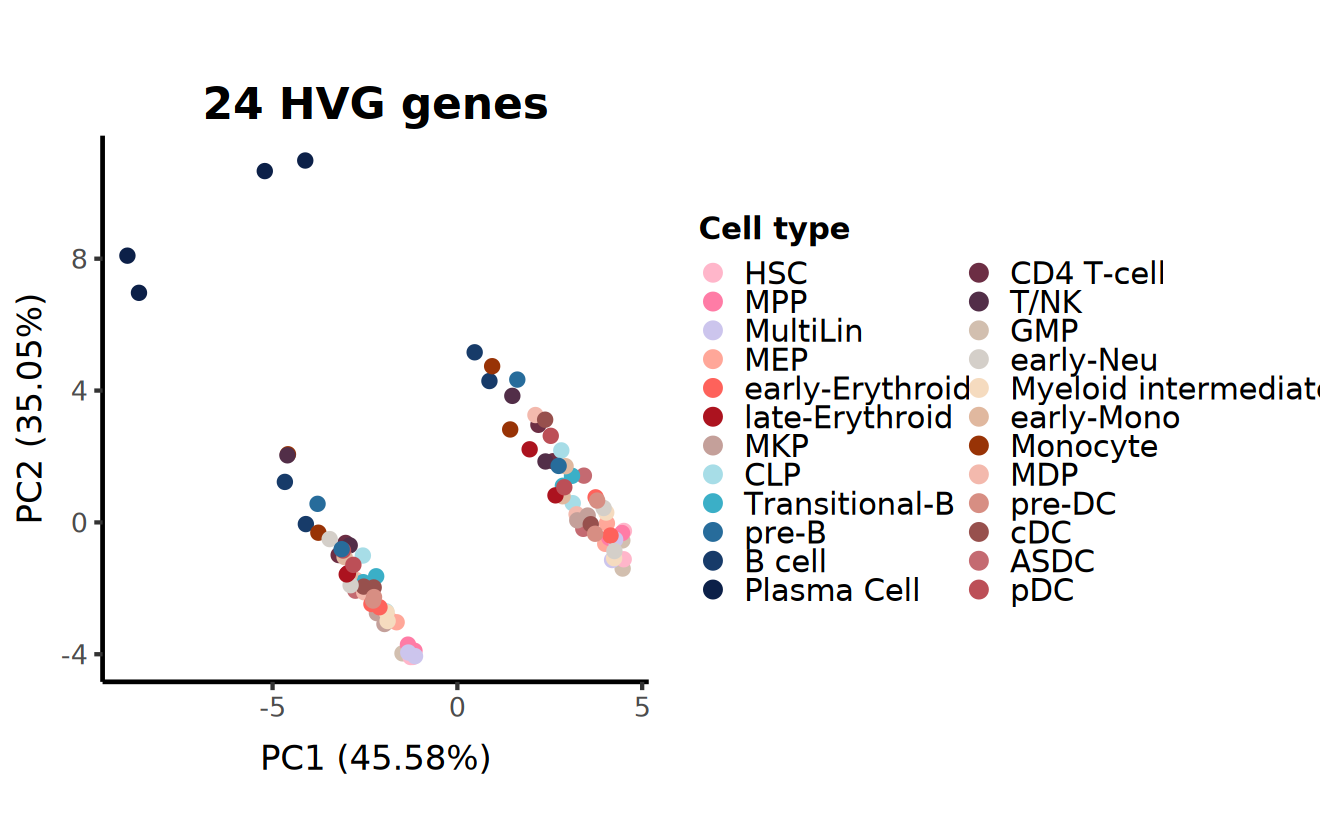

In [170]:
variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)

fig (11,7)
pca_plot2 <- plotmypca(pca_df, variance_pc1, variance_pc2, colorcode, sampleinfo) +
  ggtitle("24 HVG genes")

pca_plot2

#ggsave("pca_24_G1S_genes.pdf", plot = pca_plot, width = 11, height = 7, units = "in", dpi = 300)


In [171]:
pca_hvg24 = pca_df %>%
rename (., "x" = "pca.x...1.", 
        "y" = "pca.x...2."
       )%>%
rownames_to_column ("sample")
head(pca_hvg24)

sample      x          y        
1 BF21_ASDC   -2.7593846 -2.072096
2 BM27_ASDC    3.4072096 -0.195344
3 WF26_ASDC   -2.7525548 -1.949742
4 WM34_ASDC    3.4234989  1.418289
5 BF21_B cell -4.6670691  1.228350
6 BM27_B cell  0.8677584  4.288992

In [172]:
write.csv(pca_hvg24, "./data/Revision_Zhang_pca_hvg24.csv", row.names = FALSE)


In [173]:
set.seed(42)

logcpm2 = data.frame(logcpm) %>%
rownames_to_column ("gene")

logcpm3 <- data.table(logcpm2)
randomgenes = (logcpm3[sample(.N, 24)])$gene
#randomgenes

logcpm_random = logcpm[randomgenes,]
logcpm_random_t = t(logcpm_random)

pca <- prcomp((logcpm_random_t), scale. = TRUE)
pca_df <- data.frame(pca$x[, 1], pca$x[, 2])
#head(logcpm_random_t)

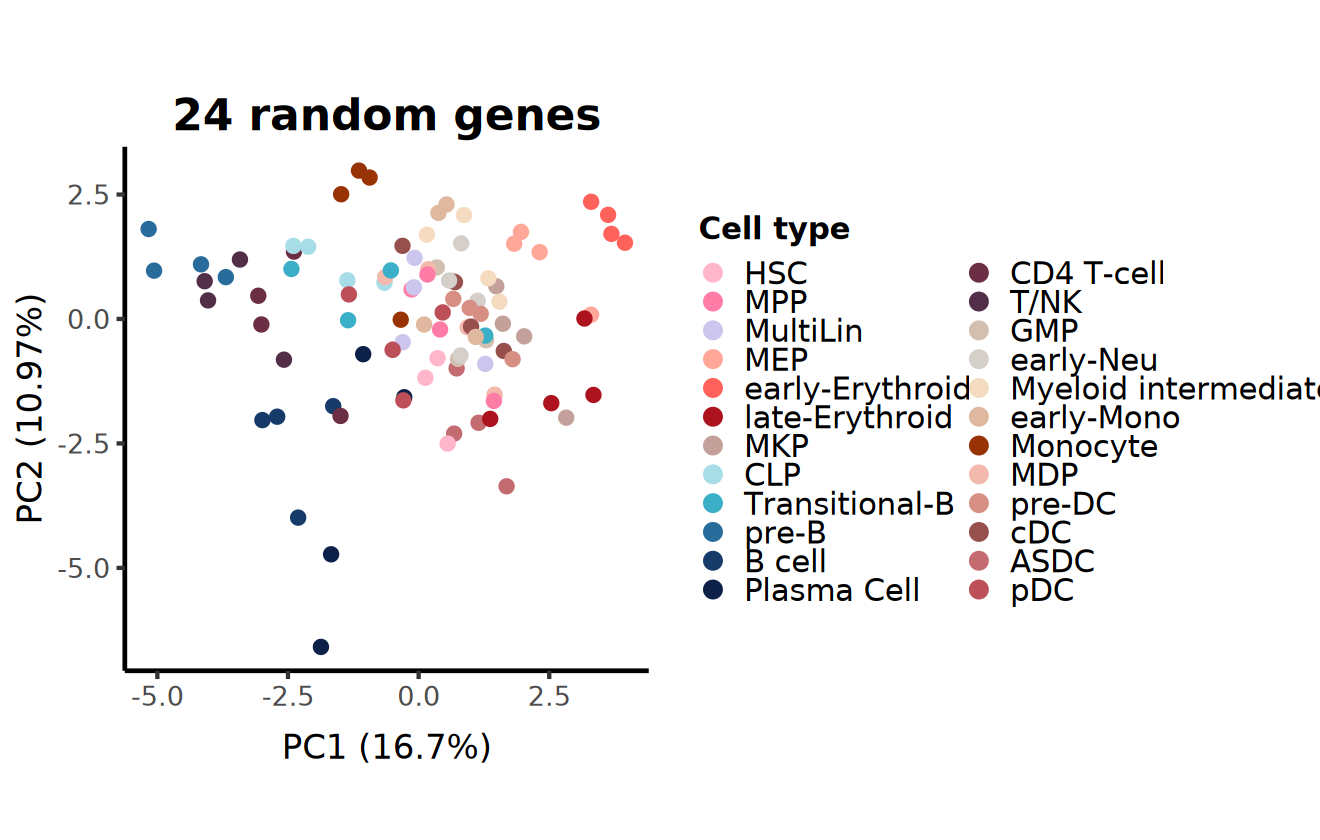

In [174]:
variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)

fig (11,7)

pca_plot3 <- plotmypca(pca_df, variance_pc1, variance_pc2, colorcode, sampleinfo) +
  ggtitle("24 random genes")

pca_plot3

#ggsave("pca_24_G1S_genes.pdf", plot = pca_plot, width = 11, height = 7, units = "in", dpi = 300)


In [175]:
pca_random24 = pca_df %>%
rename (., "x" = "pca.x...1.", 
        "y" = "pca.x...2."
       )%>%
rownames_to_column ("sample")
head(pca_random24)

sample      x          y         
1 BF21_ASDC    0.6794446 -2.3026973
2 BM27_ASDC    1.1471709 -2.0850605
3 WF26_ASDC    1.6833488 -3.3608964
4 WM34_ASDC    0.7275952 -0.9920625
5 BF21_B cell -2.9894730 -2.0314019
6 BM27_B cell -2.7063157 -1.9627379

In [176]:
write.csv(pca_random24, "./data/Revision_Zhang_pca_random24.csv", 
          row.names = FALSE)


In [177]:
receptor_genes = c(
  "KIT", "CASR", "TNFRSF1A", "TNFRSF1B", "CSF3R", "CSF2RA", "CSF2RB", "IL6R",
  "CXCR4", "CXCR1", "CXCR2", "TGFBR1", "TGFBR2", "FGFR1", "IL1R1", "TNFRSF13B",
  "MPL", "LEPR", "CD44", "TFRC", "CD27", "CCR2", "FOLR2", "NGFR"
)


In [178]:
missing_genes <- receptor_genes[!receptor_genes %in% rownames(logcpm)]
missing_genes

character(0)

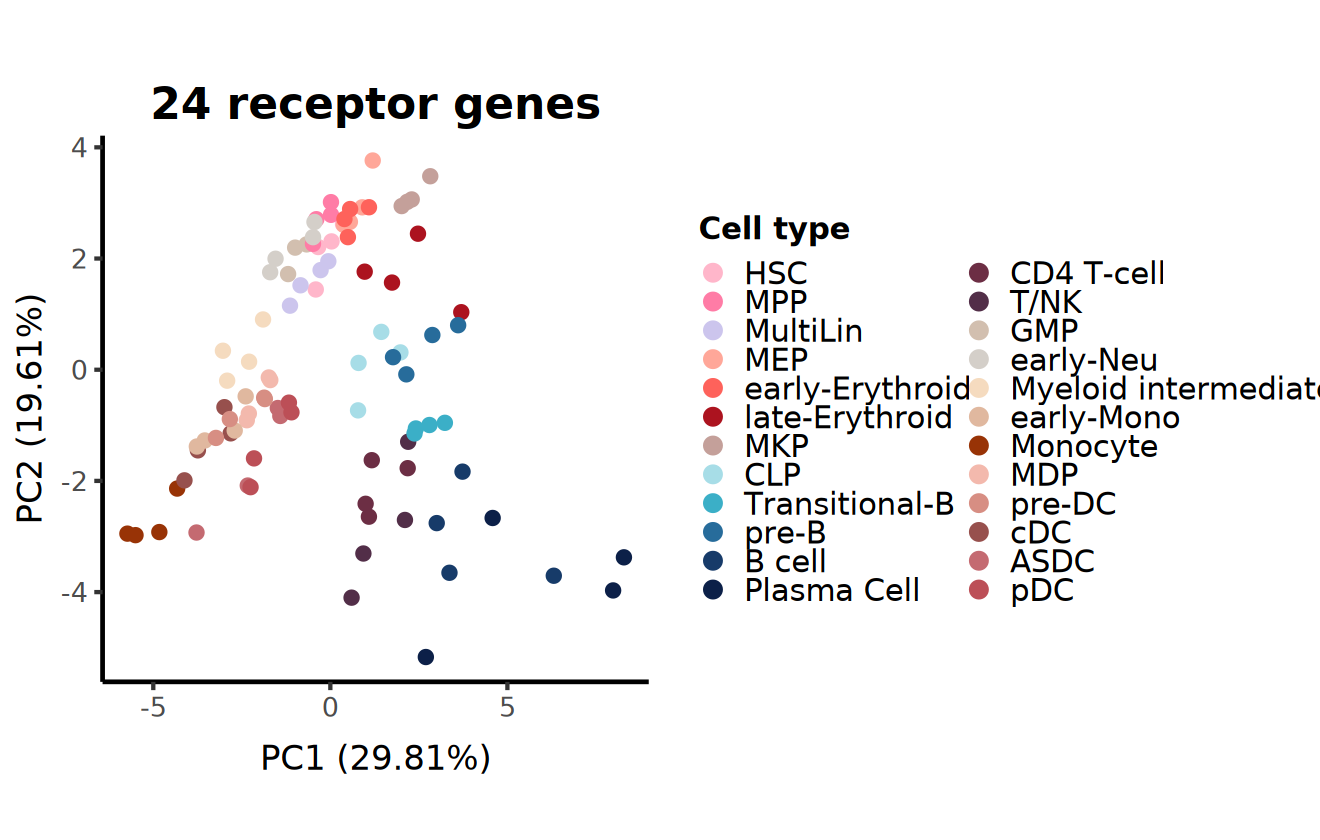

In [180]:
logcpm_CC = logcpm[receptor_genes,]
logcpm_CC_t = t(logcpm_CC)

pca <- prcomp((logcpm_CC_t), scale. = TRUE)

pca_df <- data.frame(pca$x[, 1], pca$x[, 2])

variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)

fig (11,7)

pca_plot4 <- plotmypca(pca_df, variance_pc1, variance_pc2, colorcode, sampleinfo) +
  ggtitle("24 receptor genes")

pca_plot4

#ggsave("pca_24_G1S_genes.pdf", plot = pca_plot, width = 11, height = 7, units = "in", dpi = 300)


In [181]:
pca_receptors24 = pca_df %>%
rename (., "x" = "pca.x...1.", 
        "y" = "pca.x...2."
       )%>%
rownames_to_column ("sample")
head(pca_receptors24)

sample      x         y         
1 BF21_ASDC   -1.482604 -0.6889136
2 BM27_ASDC   -2.331398 -2.0831601
3 WF26_ASDC   -1.412629 -0.8315046
4 WM34_ASDC   -3.779262 -2.9281561
5 BF21_B cell  3.732657 -1.8332240
6 BM27_B cell  3.004343 -2.7587082

In [182]:
write.csv(pca_receptors24, "./data/Revision_Zhang_pca_receptors24.csv", 
          row.names = FALSE)


[1] "AURKB"   "BIRC5"   "CCNA2"   "CDC20"   "CENPA"   "CENPI"   "CKAP5"  
 [8] "DDX21"   "ECT2"    "ESPL1"   "KIF11"   "KIF23"   "NCAPD2"  "NDC80"  
[15] "PLK1"    "POLR2B"  "RACGAP1" "RANGAP1" "RBBP6"   "RBMX"    "SF1"    
[22] "SFPQ"    "SMC4"    "SON"     "TOP2A"   "TPX2"    "WDR43"   "ZMAT2"  
[29] "KNL1"

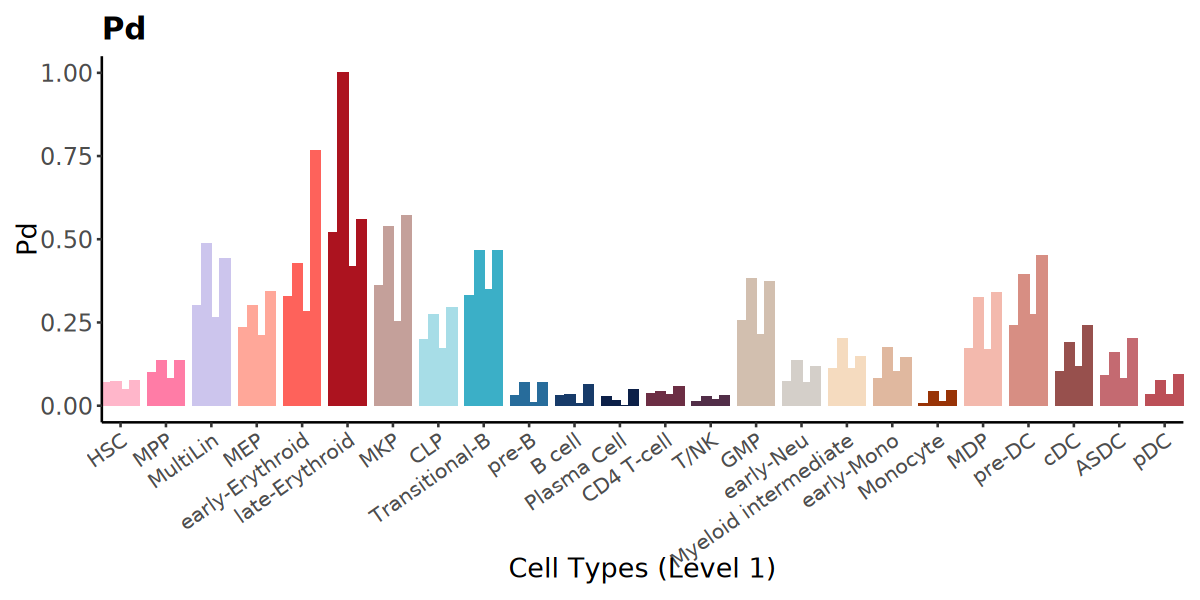

In [155]:
post_g1s = read.table ("/research/work/andreha/privat/Andrea/2024_Sylvain/data/postG1S_updated.csv", header = TRUE, sep = ",")
post_g1s = post_g1s$genes
post_g1s

x_pink <- x[post_g1s, ]

x_pink_normalized <- t(apply(x_pink, 1, function(gene_counts) {
  gene_counts / sampleinfo$psbulk_n_cells 
}))

x_pink_zscore <- t(apply(x_pink_normalized, 1, function(gene_counts) {
  (gene_counts - mean(gene_counts, na.rm = TRUE)) / sd(gene_counts, na.rm = TRUE)
}))

sample_avg_zscore <- colMeans(x_pink_zscore, na.rm = TRUE)

score_df <- data.frame(sample = names(sample_avg_zscore), avg_zscore = sample_avg_zscore)

combined_Pd_df <- merge(score_df, sampleinfo, by = "sample")

combined_Pd_df$prop2div <- (combined_Pd_df$avg_zscore - min(combined_Pd_df$avg_zscore)) /
                         (max(combined_Pd_df$avg_zscore) - min(combined_Pd_df$avg_zscore))

combined_Pd_df$`Level 2` <- factor(combined_Pd_df$`Level 2`, levels = names(colorcode))


barplot <- ggplot(combined_Pd_df, 
                  aes(x = `Level 2`, y = prop2div, fill = `Level 2`, group = `donor_id`)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), show.legend = FALSE) +  
  scale_fill_manual(values = colorcode) + 
  theme_classic() +
  theme(
    axis.text.x = element_text(angle = 35, hjust = 1, size = 12),
    axis.text.y = element_text(size = 14),
    axis.title.x = element_text(size = 16),
    axis.title.y = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold"),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.margin = margin(10, 10, 10, 10)
  ) +
  labs(x = "Cell Types (Level 1)", y = "Pd", title = "Pd") +
  scale_x_discrete(expand = c(0, 0)) 

fig (10,5)
barplot

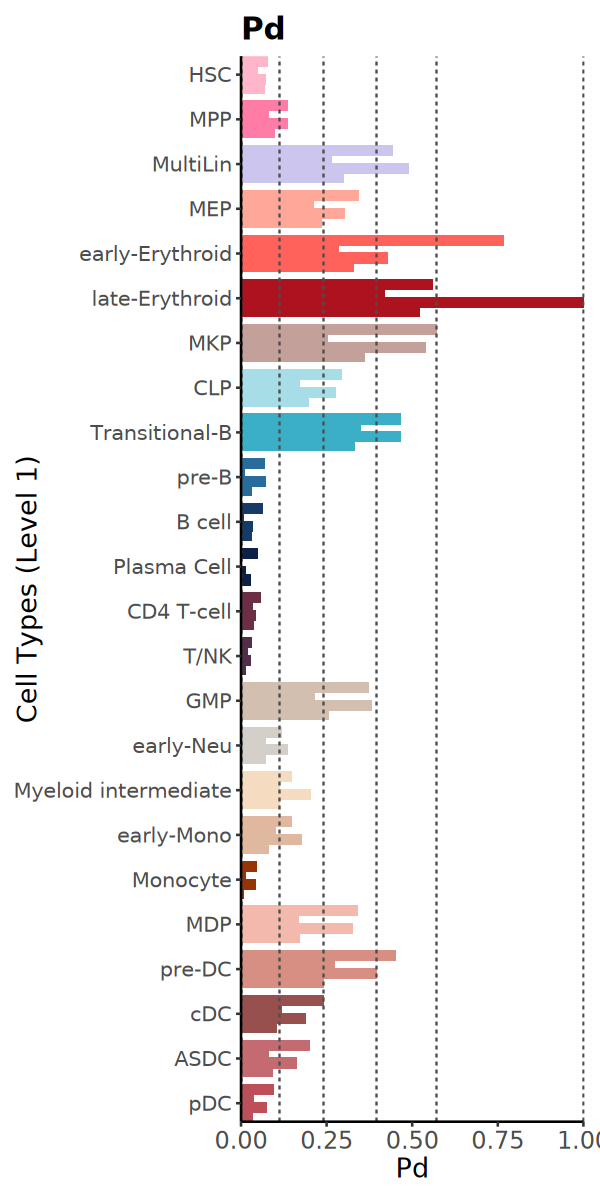

In [156]:
library(classInt)

combined_Pd_df$`Level 2` <- factor(combined_Pd_df$`Level 2`, levels = rev(names(colorcode)))


jenks <- classIntervals(combined_Pd_df$prop2div, n = 5, style = "jenks")
jenks_breaks <- jenks$brks


fig(5, 10)
barplot <- ggplot(combined_Pd_df, 
                  aes(x = prop2div, y = `Level 2`, fill = `Level 2`, group = donor_id)) +
  geom_bar(stat = "identity", position = position_dodge(width = 0.8), show.legend = FALSE) +
  scale_fill_manual(values = colorcode) +
  geom_vline(xintercept = jenks_breaks, linetype = "dashed", color = "grey30", linewidth = 0.5) +
  theme_classic() +
  theme(
    axis.text.y = element_text(size = 12),
    axis.text.x = element_text(size = 14),
    axis.title.y = element_text(size = 16),
    axis.title.x = element_text(size = 16),
    plot.title = element_text(size = 18, face = "bold"),
    legend.title = element_text(size = 14),
    legend.text = element_text(size = 12),
    plot.margin = margin(10, 10, 10, 10)
  ) +
  labs(y = "Cell Types (Level 1)", x = "Pd", title = "Pd") +
  scale_y_discrete(expand = c(0, 0)) +
  scale_x_continuous(expand = c(0, 0))  #

barplot


In [157]:
library(dplyr)

sampleinfo <- sampleinfo %>%
  left_join(combined_Pd_df[, c("sample", "prop2div")], by = "sample")


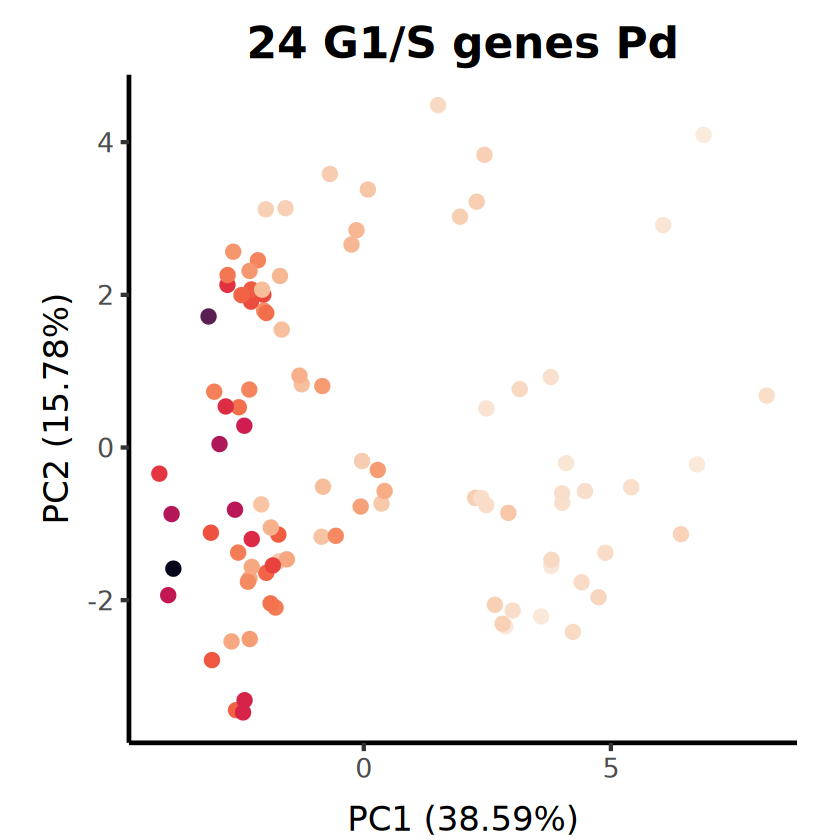

In [163]:
library(scales)
library(viridis)

#--------
G1Sgenes = c("CCND1","CCND2","CCND3","CCNE1","CCNE2", # cyclins
             "RB1","RBL1","RBL2", # RB related proteins
             "CDK2","CDK4","CDK6",
             "E2F1","E2F2","E2F3",
             "CDC25A","CDKN1A","CDKN1B","CDKN1C","CDKN2A","CDKN2B","CDKN2C","CDKN2D","CDKN3", "MYC")

logcpm_CC = logcpm[G1Sgenes,]
logcpm_CC_t = t(logcpm_CC)

pca <- prcomp((logcpm_CC_t), scale. = TRUE)
pca_df <- data.frame(pca$x[, 1], pca$x[, 2])


variance_pc1 <- round(summary(pca)$importance["Proportion of Variance", "PC1"] * 100, 2)
variance_pc2 <- round(summary(pca)$importance["Proportion of Variance", "PC2"] * 100, 2)

fig(7, 7)

q95 <- quantile(sampleinfo$prop2div, 1, na.rm = TRUE)


pca_df$prop2div <- sampleinfo$prop2div

pca_plot5 = ggplot(pca_df, 
       aes(x = pca.x...1., 
           y = pca.x...2.,
           color = prop2div)) +   
  geom_point(shape = 16, size = 4) + 
  xlab(paste0("PC1 (", variance_pc1, "%)")) +
  ylab(paste0("PC2 (", variance_pc2, "%)")) +
  scale_color_viridis(
    option = "rocket",
    direction = -1,
    name = "Prop2Div",
    oob = squish,
    limits = c(min(sampleinfo$prop2div, na.rm = TRUE), q95)
  ) +
  theme_classic(base_size = 20, base_family = "sans") +
    theme(
      aspect.ratio = 1, 
      axis.text = element_text(size = 16), 
      axis.title = element_text(size = 20), 
      axis.title.x = element_text(vjust = -1),
      plot.title = element_text(hjust = 0.5, size = 26, vjust = 0, face = "bold"),
      plot.subtitle = element_text(hjust = 0.5, size = 20, vjust = 0), 
      legend.title = element_text(color = "black", size = 18, face = "bold"), 
      legend.text = element_text(color = "black", size = 18),
      axis.line.x = element_line(size = 1),
      axis.line.y = element_line(size = 1)
  ) +
  guides(color = guide_colorbar(barwidth = 1, barheight = 8))  

pca_plot5 = pca_plot5+theme(legend.position = "none")+ggtitle("24 G1/S genes Pd")
pca_plot5

In [164]:
ggsave("./data/Revision_Zhang_pca_plotPd.pdf", 
       plot = pca_plot5, width = 5.5, height = 5.5)#, units = "in", dpi = 300)


# Clustering Efficiancy Metrics

In [1]:
import scanpy as sc
import os
#import scvi
#import bbknn
import scib
import numpy as np
import pandas as pd
#import matplotlib.pyplot as plt
#import matplotlib

In [10]:
ad = sc.read_h5ad("/research/work/andreha/privat/Andrea/2025_Sylvain/data/pdata_Zhang2024_Level1.h5ad")

ad.obs["cell_type"] = ad.obs["Level 2"]

# Filter out Ba/Ma/Eo
exclude = ["Ba/Ma/Eo", "Mac"]
ad = ad[~ad.obs["cell_type"].isin(exclude)].copy()
ad

AnnData object with n_obs × n_vars = 96 × 33352
    obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 2', 'Donor', 'psbulk_n_cells', 'psbulk_counts'
    layers: 'psbulk_props'

In [11]:
desired_order = [
    "HSC",
    "MPP",
    "MultiLin",
    "MEP",
    "early-Erythroid",
    "late-Erythroid",
    "MKP",
    "CLP",
    "Transitional-B",
    "pre-B",
    "B cell",
    "Plasma Cell",
    "CD4 T-cell",
    "T/NK",
    "GMP",
    "early-Neu",
    "early-Mono",
    "Monocyte",
   "Myeloid intermediate",
    "MDP",
    "pre-DC",
    "cDC",
    "pDC",
    "ASDC"
]

ad.obs['cell_type'] = pd.Categorical(ad.obs['cell_type'], 
                                     categories=desired_order, ordered=True)

In [12]:
directory_path = "/research/work/andreha/privat/Andrea/2025_Sylvain/data/"

all_files = os.listdir(directory_path)


filtered_files = [file for file in all_files if "pca" in file and ".csv" in file and "Zhang" in file]

filtered_files

['Revision_Zhang_pca_hvg24.csv',
 'Revision_Zhang_pca_random24.csv',
 'Revision_Zhang_pca_CC24.csv',
 'Revision_Zhang_pca_receptors24.csv']

In [13]:
# remove substrings
samples = [name.replace('pca_', '').replace('.csv', '') for name in filtered_files]
print(samples)

['Revision_Zhang_hvg24', 'Revision_Zhang_random24', 'Revision_Zhang_CC24', 'Revision_Zhang_receptors24']


In [14]:
for filename in filtered_files:
    pca_path = os.path.join(directory_path, filename)
    pca = pd.read_csv(pca_path)
    print(f"\n--- {filename} ---")
    print(pca[['sample', 'x', 'y']].head())



--- Revision_Zhang_pca_hvg24.csv ---
        sample         x         y
0    BF21_ASDC -2.759385 -2.072096
1    BM27_ASDC  3.407210 -0.195344
2    WF26_ASDC -2.752555 -1.949742
3    WM34_ASDC  3.423499  1.418289
4  BF21_B cell -4.667069  1.228350

--- Revision_Zhang_pca_random24.csv ---
        sample         x         y
0    BF21_ASDC  0.679445 -2.302697
1    BM27_ASDC  1.147171 -2.085060
2    WF26_ASDC  1.683349 -3.360896
3    WM34_ASDC  0.727595 -0.992063
4  BF21_B cell -2.989473 -2.031402

--- Revision_Zhang_pca_CC24.csv ---
        sample         x         y
0    BF21_ASDC  0.358684 -0.733667
1    BM27_ASDC  0.421681 -0.570087
2    WF26_ASDC -0.036275 -0.177562
3    WM34_ASDC  0.282653 -0.293980
4  BF21_B cell  4.476043 -0.570995

--- Revision_Zhang_pca_receptors24.csv ---
        sample         x         y
0    BF21_ASDC -1.482604 -0.688914
1    BM27_ASDC -2.331398 -2.083160
2    WF26_ASDC -1.412629 -0.831505
3    WM34_ASDC -3.779262 -2.928156
4  BF21_B cell  3.732657 -1.833224


In [16]:
directory_path = "/research/work/andreha/privat/Andrea/2025_Sylvain/data/"


all_files = os.listdir(directory_path)

filtered_files = [file for file in all_files if "pca" in file and ".csv" in file and "Zhang" in file]

adata_list = []

for filename in filtered_files:
    try:
        # Load PCA coordinates
        pca = pd.read_csv(os.path.join(directory_path, filename))
        pca.set_index('sample', inplace=True)

        ad_copy = ad.copy()

        # add PCA coordinates as a new layer in obsm
        ad_copy.obsm["pca"] = pca[['x', 'y']].values

        sc.pp.neighbors(ad_copy, use_rep="pca")
        scib.me.cluster_optimal_resolution(ad_copy, cluster_key="cluster", label_key="cell_type")

        adata_list.append(ad_copy)
    except Exception as e:
        print(f"Error processing {filename}: {e}")



Cluster for cluster_0.2 with leiden
resolution: 0.2, nmi: 0.12539010785743307
Cluster for cluster_0.4 with leiden
resolution: 0.4, nmi: 0.33339939004690367
Cluster for cluster_0.6 with leiden
resolution: 0.6, nmi: 0.33339939004690367
Cluster for cluster_0.8 with leiden
resolution: 0.8, nmi: 0.417084818830825
Cluster for cluster_1.0 with leiden
resolution: 1.0, nmi: 0.41268638742228225
Cluster for cluster_1.2 with leiden
resolution: 1.2, nmi: 0.43807740827257174
Cluster for cluster_1.4 with leiden
resolution: 1.4, nmi: 0.43807740827257174
Cluster for cluster_1.6 with leiden
resolution: 1.6, nmi: 0.43807740827257174
Cluster for cluster_1.8 with leiden
resolution: 1.8, nmi: 0.43807740827257174
Cluster for cluster_2.0 with leiden
resolution: 2.0, nmi: 0.46716255705822846
optimised clustering against cell_type
optimal cluster resolution: 2.0
optimal score: 0.46716255705822846
Cluster for cluster_0.2 with leiden
resolution: 0.2, nmi: 0.15569068109931433
Cluster for cluster_0.4 with leiden
re

/research/users/andreha/miniconda3/envs/traj_inf/lib/python3.12/site-packages/scib/metrics/clustering.py:96: FutureWarning: In the future, the default backend for leiden will be igraph instead of leidenalg.

 To achieve the future defaults please pass: flavor="igraph" and n_iterations=2.  directed must also be False to work with igraph's implementation.
  cluster_function(adata, resolution=res, key_added=resolution_key, **kwargs)


optimised clustering against cell_type
optimal cluster resolution: 1.8
optimal score: 0.5689629983402577
Cluster for cluster_0.2 with leiden
resolution: 0.2, nmi: 0.4988615027034393
Cluster for cluster_0.4 with leiden
resolution: 0.4, nmi: 0.5638130236582726
Cluster for cluster_0.6 with leiden
resolution: 0.6, nmi: 0.6149970495906192
Cluster for cluster_0.8 with leiden
resolution: 0.8, nmi: 0.6652893389228561
Cluster for cluster_1.0 with leiden
resolution: 1.0, nmi: 0.6634342387783031
Cluster for cluster_1.2 with leiden
resolution: 1.2, nmi: 0.6634342387783031
Cluster for cluster_1.4 with leiden
resolution: 1.4, nmi: 0.7314682742445111
Cluster for cluster_1.6 with leiden
resolution: 1.6, nmi: 0.7314682742445111
Cluster for cluster_1.8 with leiden
resolution: 1.8, nmi: 0.760362710503438
Cluster for cluster_2.0 with leiden
resolution: 2.0, nmi: 0.760362710503438
optimised clustering against cell_type
optimal cluster resolution: 1.8
optimal score: 0.760362710503438
Cluster for cluster_0.2

In [17]:
adata_list

[AnnData object with n_obs × n_vars = 96 × 33352
     obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 2', 'Donor', 'psbulk_n_cells', 'psbulk_counts', 'cluster_0.2', 'cluster_0.4', 'cluster_0.6', 'cluster_0.8', 'cluster_1.0', 'cluster_1.2', 'cluster_1.4', 'cluster_1.6', 'cluster_1.8', 'cluster_2.0', 'cluster'
     uns: 'neighbors', 'cluster_0.2', 'cluster_0.4', 'cluster_0.6', 'cluster_0.8', 'cluster_1.0', 'cluster_1.2', 'cluster_1.4', 'cluster_1.6', 'cluster_1.8', 'cluster_2.0'
     obsm: 'pca'
     layers: 'psbulk_props'
     obsp: 'distances', 'connectivities',
 AnnData object with n_obs × n_vars = 96 × 33352
     obs: 'donor_id', 'cell_type', 'ancestry', 'sex', 'age', 'Level 2', 'Donor', 'psbulk_n_cells', 'psbulk_counts', 'cluster_0.2', 'cluster_0.4', 'cluster_0.6', 'cluster_0.8', 'cluster_1.0', 'cluster_1.2', 'cluster_1.4', 'cluster_1.6', 'cluster_1.8', 'cluster_2.0', 'cluster'
     uns: 'neighbors', 'cluster_0.2', 'cluster_0.4', 'cluster_0.6', 'cluster_0.8', 'cluster

In [18]:
results = []

for ad in adata_list:
    
    asw= scib.me.silhouette(ad, label_key="cell_type", embed="pca")
    results.append(asw)    

df_ASW = pd.DataFrame(results, columns=['ASW'])

df_ASW['Dataset'] = samples

df_ASW = df_ASW[['Dataset', 'ASW']]

In [19]:
results = []

for ad in adata_list:
    
    ari = scib.me.ari(ad, cluster_key="cluster", label_key="cell_type")
    results.append(ari)    

df_ARI = pd.DataFrame(results, columns=['ARI'])

df_ARI['Dataset'] = samples

df_ARI = df_ARI[['Dataset', 'ARI']]
df_ARI

Dataset       ARI
0        Revision_Zhang_hvg24  0.062736
1     Revision_Zhang_random24  0.155817
2         Revision_Zhang_CC24  0.357230
3  Revision_Zhang_receptors24  0.225773

In [20]:
results = []

for ad in adata_list:
    
    nmi = scib.me.nmi(ad, cluster_key="cluster", label_key="cell_type")
    results.append(nmi)    

df_NMI = pd.DataFrame(results, columns=['NMI'])

df_NMI['Dataset'] = samples

df_NMI = df_NMI[['Dataset', 'NMI']]
df_NMI

Dataset       NMI
0        Revision_Zhang_hvg24  0.467163
1     Revision_Zhang_random24  0.568963
2         Revision_Zhang_CC24  0.760363
3  Revision_Zhang_receptors24  0.649088

In [21]:
merged_df = pd.merge(df_ASW, df_ARI, on="Dataset")
merged_df = pd.merge(merged_df, df_NMI, on="Dataset")
merged_df

Dataset       ASW       ARI       NMI
0        Revision_Zhang_hvg24  0.382759  0.062736  0.467163
1     Revision_Zhang_random24  0.426258  0.155817  0.568963
2         Revision_Zhang_CC24  0.614072  0.357230  0.760363
3  Revision_Zhang_receptors24  0.492653  0.225773  0.649088

In [22]:
import pandas as pd

merged_df.to_csv("./data/Revision_Zhang_PCA_perf.csv", index=False)
